In [12]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 15)
pd.set_option('display.width', 1000)

# Load data
df = pd.read_csv('all_teams_transition_data.csv')

In [13]:
# Basic dataset information
print(f"Dataset shape: {df.shape}")
print(f"\nPreview of the data:")
display(df.head())

print("\nColumn data types:")
display(df.dtypes)

# Check unique values
print(f"\nNumber of unique games: {df['game_id'].nunique()}")
print(f"Number of unique teams: {df['team_name'].nunique()}")
print(f"Number of unique players: {df['player_name'].nunique()}")
print(f"Number of unique transition events: {df['loss_event_id'].nunique()}")

Dataset shape: (105675, 27)

Preview of the data:


loss_event_id                    game_id  period_id  loss_time           team_losing_ball          team_gaining_ball  loss_x  loss_y  action_id  seconds_after_loss                    team_id    team_name                  player_id        player_name  action_type  result  start_x  start_y   end_x   end_y movement_direction         x_sector y_sector game_direction  successful_defensive_action  defensive_success  time_to_defensive_action
0             11  5oc8drrbruovbuiriyhdyiyok          1       26.0  1oyb7oym5nwzny8vxf03szd2h  b7jmo07lqav0wfe2mtlzyspak   49.77   24.14         12                 1.0  b7jmo07lqav0wfe2mtlzyspak     Mechelen  7e0cr2upqlgq4btrm3h99bpey  B. Van den Eynden           10       1   70.560   32.232  70.560  32.232            NEUTRAL  ATTACKING_THIRD   CENTER  LEFT_TO_RIGHT                         True              False                       NaN
1             11  5oc8drrbruovbuiriyhdyiyok          1       26.0  1oyb7oym5nwzny8vxf03szd2h  b7jmo07lqav0wfe2mtlzyspak   49.77   24.14         13                 4.0  b7jmo07lqav0wfe2mtlzyspak     Mechelen  3eywxsna9qzi1egis1uj4l6mt       G. Hairemans            0       0   60.690   36.788  49.665  32.368            FORWARD     MIDDLE_THIRD   CENTER  LEFT_TO_RIGHT                        False              False                       NaN
2             11  5oc8drrbruovbuiriyhdyiyok          1       26.0  1oyb7oym5nwzny8vxf03szd2h  b7jmo07lqav0wfe2mtlzyspak   49.77   24.14         14                 6.0  1oyb7oym5nwzny8vxf03szd2h  Club Brugge   l6y4o9t2b0jxaxo85oztok45         B. Mechele            0       0   50.505   29.716  60.585  28.696            FORWARD     MIDDLE_THIRD   CENTER  LEFT_TO_RIGHT                        False              False                       NaN
3             11  5oc8drrbruovbuiriyhdyiyok          1       26.0  1oyb7oym5nwzny8vxf03szd2h  b7jmo07lqav0wfe2mtlzyspak   49.77   24.14         15                 7.0  b7jmo07lqav0wfe2mtlzyspak     Mechelen  25ey2mcvgwz6ls2612os5hzv9         R. Schoofs            0       0   60.900   29.512  34.860  37.128            FORWARD     MIDDLE_THIRD   CENTER  LEFT_TO_RIGHT                        False              False                       NaN
4             11  5oc8drrbruovbuiriyhdyiyok          1       26.0  1oyb7oym5nwzny8vxf03szd2h  b7jmo07lqav0wfe2mtlzyspak   49.77   24.14         16                 9.0  1oyb7oym5nwzny8vxf03szd2h  Club Brugge  buglwgk2hthoyqt1ocghya92i          Z. Romero            0       1   39.480   38.556  32.865  47.328           BACKWARD     MIDDLE_THIRD   CENTER  LEFT_TO_RIGHT                        False              False                       NaN


Column data types:


loss_event_id                    int64
game_id                         object
period_id                        int64
loss_time                      float64
team_losing_ball                object
                                ...   
y_sector                        object
game_direction                  object
successful_defensive_action       bool
defensive_success                 bool
time_to_defensive_action       float64
Length: 27, dtype: object


Number of unique games: 137
Number of unique teams: 16
Number of unique players: 402
Number of unique transition events: 21938


In [14]:
numerical_cols = ['loss_event_id', 'period_id', 'loss_time', 'loss_x', 'loss_y', 
                 'action_id', 'seconds_after_loss', 'action_type', 'result',
                 'start_x', 'start_y', 'end_x', 'end_y']

for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Create a function to draw a soccer pitch
def draw_pitch(ax, pitch_color='#B3DE69', line_color='white', pitch_width=105, pitch_height=68):
    # Main field outline
    rect = patches.Rectangle((0, 0), pitch_width, pitch_height, linewidth=2, 
                           edgecolor=line_color, facecolor=pitch_color, alpha=0.7, zorder=0)
    ax.add_patch(rect)
    
    # Halfway line
    ax.plot([pitch_width/2, pitch_width/2], [0, pitch_height], color=line_color, linewidth=2, zorder=1)
    
    # Center circle
    center_circle = patches.Circle((pitch_width/2, pitch_height/2), 9.15, 
                                 fill=False, color=line_color, linewidth=2, zorder=1)
    ax.add_patch(center_circle)
    
    # Center spot
    center_spot = patches.Circle((pitch_width/2, pitch_height/2), 0.8, 
                              color=line_color, zorder=1)
    ax.add_patch(center_spot)
    
    # Penalty areas
    left_penalty = patches.Rectangle((0, (pitch_height - 40.32)/2), 16.5, 40.32, 
                                   linewidth=2, edgecolor=line_color, facecolor='none', zorder=1)
    ax.add_patch(left_penalty)
    
    right_penalty = patches.Rectangle((pitch_width - 16.5, (pitch_height - 40.32)/2), 16.5, 40.32, 
                                    linewidth=2, edgecolor=line_color, facecolor='none', zorder=1)
    ax.add_patch(right_penalty)
    
    # Goal areas
    left_goal_area = patches.Rectangle((0, (pitch_height - 18.32)/2), 5.5, 18.32, 
                                     linewidth=2, edgecolor=line_color, facecolor='none', zorder=1)
    ax.add_patch(left_goal_area)
    
    right_goal_area = patches.Rectangle((pitch_width - 5.5, (pitch_height - 18.32)/2), 5.5, 18.32, 
                                      linewidth=2, edgecolor=line_color, facecolor='none', zorder=1)
    ax.add_patch(right_goal_area)
    
    # Penalty spots
    left_penalty_spot = patches.Circle((11, pitch_height/2), 0.8, color=line_color, zorder=1)
    ax.add_patch(left_penalty_spot)
    
    right_penalty_spot = patches.Circle((pitch_width - 11, pitch_height/2), 0.8, color=line_color, zorder=1)
    ax.add_patch(right_penalty_spot)
    
    # Penalty arcs
    left_arc = patches.Arc((11, pitch_height/2), 18.3, 18.3, 
                        theta1=310, theta2=50, linewidth=2, color=line_color, zorder=1)
    ax.add_patch(left_arc)
    
    right_arc = patches.Arc((pitch_width - 11, pitch_height/2), 18.3, 18.3, 
                         theta1=130, theta2=230, linewidth=2, color=line_color, zorder=1)
    ax.add_patch(right_arc)
    
    # Corner arcs
    top_left_corner = patches.Arc((0, pitch_height), 2, 2, 
                               theta1=0, theta2=90, linewidth=2, color=line_color, zorder=1)
    ax.add_patch(top_left_corner)
    
    bottom_left_corner = patches.Arc((0, 0), 2, 2, 
                                  theta1=270, theta2=360, linewidth=2, color=line_color, zorder=1)
    ax.add_patch(bottom_left_corner)
    
    top_right_corner = patches.Arc((pitch_width, pitch_height), 2, 2, 
                                theta1=90, theta2=180, linewidth=2, color=line_color, zorder=1)
    ax.add_patch(top_right_corner)
    
    bottom_right_corner = patches.Arc((pitch_width, 0), 2, 2, 
                                   theta1=180, theta2=270, linewidth=2, color=line_color, zorder=1)
    ax.add_patch(bottom_right_corner)
    
    # Set axis limits and remove ticks
    ax.set_xlim(-5, pitch_width + 5)
    ax.set_ylim(-5, pitch_height + 5)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add third markers (optional)
    ax.plot([35, 35], [0, pitch_height], color=line_color, linestyle='--', alpha=0.5, linewidth=1, zorder=1)
    ax.plot([70, 70], [0, pitch_height], color=line_color, linestyle='--', alpha=0.5, linewidth=1, zorder=1)
    
    return ax

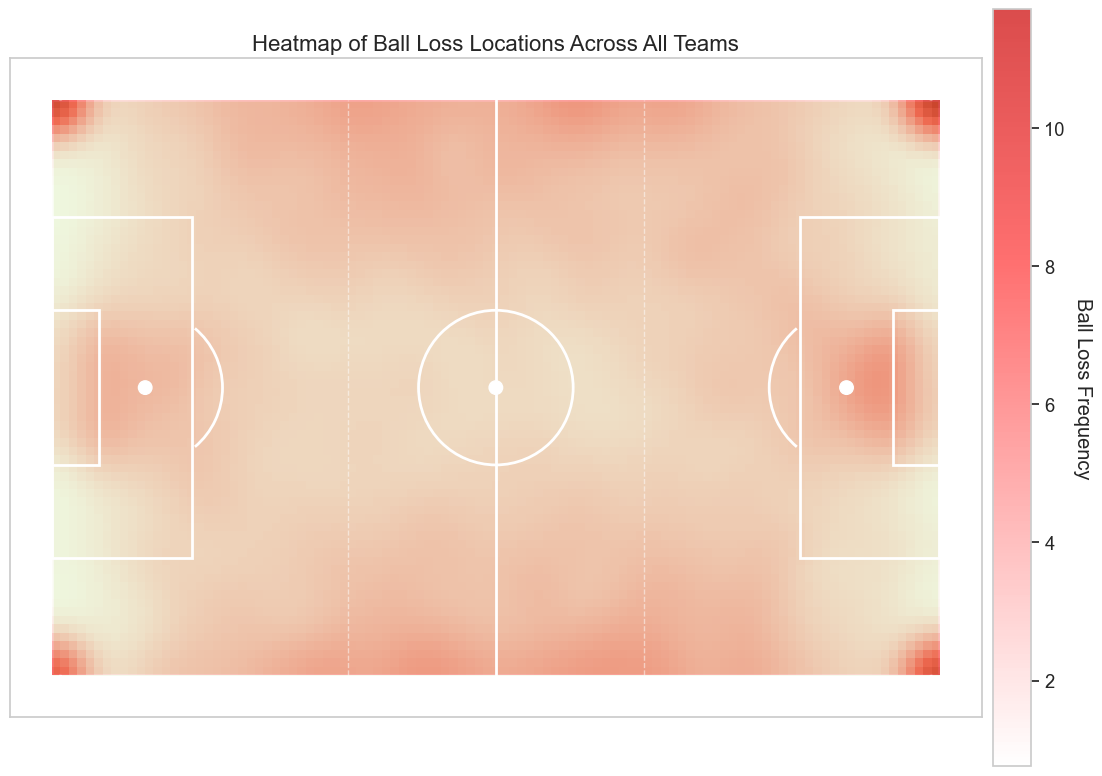

In [15]:
plt.figure(figsize=(12, 8))
ax = plt.subplot()
draw_pitch(ax)

pitch_height = 68
pitch_width = 105

heatmap_data = np.zeros((int(pitch_width), int(pitch_height)))

for _, row in df.drop_duplicates(subset=['loss_event_id']).iterrows():
    x, y = int(min(row['loss_x'], pitch_width-1)), int(min(row['loss_y'], pitch_height-1))
    heatmap_data[x, y] += 1


from scipy.ndimage import gaussian_filter
heatmap_data_smooth = gaussian_filter(heatmap_data, sigma=3)

cmap = LinearSegmentedColormap.from_list('white_to_red', ['white', '#FF9999', '#FF3333', '#CC0000'])

plt.imshow(heatmap_data_smooth.T, origin='lower', cmap=cmap, 
           extent=[0, pitch_width, 0, pitch_height], alpha=0.7)

cbar = plt.colorbar(pad=0.01)
cbar.set_label('Ball Loss Frequency', rotation=270, labelpad=20)

plt.title('Heatmap of Ball Loss Locations Across All Teams', fontsize=16)
plt.tight_layout()
plt.savefig('../visualisation/ball_loss_heatmap_all_teams.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
def categorize_field_zone(x, y):
    if x < 35:
        x_zone = "Defensive Third"
    elif x < 70:
        x_zone = "Middle Third"
    else:
        x_zone = "Attacking Third"
    
    if y < 22.67:
        y_zone = "Left Wing"
    elif y < 45.33:
        y_zone = "Central"
    else:
        y_zone = "Right Wing"
    
    return f"{x_zone} - {y_zone}"

df['loss_zone'] = df.apply(lambda row: categorize_field_zone(row['loss_x'], row['loss_y']), axis=1)

plt.figure(figsize=(14, 8))
unique_losses = df.drop_duplicates(subset=['loss_event_id'])
loss_zone_counts = unique_losses['loss_zone'].value_counts()

palette = sns.color_palette("viridis", 9)
ax = sns.barplot(x=loss_zone_counts.index, y=loss_zone_counts.values, palette=palette)

for i, v in enumerate(loss_zone_counts.values):
    ax.text(i, v + 50, str(v), ha='center', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Ball Losses by Field Zone', fontsize=16)
plt.ylabel('Number of Ball Losses', fontsize=14)
plt.xlabel('Field Zone', fontsize=14)
plt.tight_layout()
plt.savefig('../visualisation/ball_loss_distribution_by_zone.png', dpi=300, bbox_inches='tight')
plt.show()

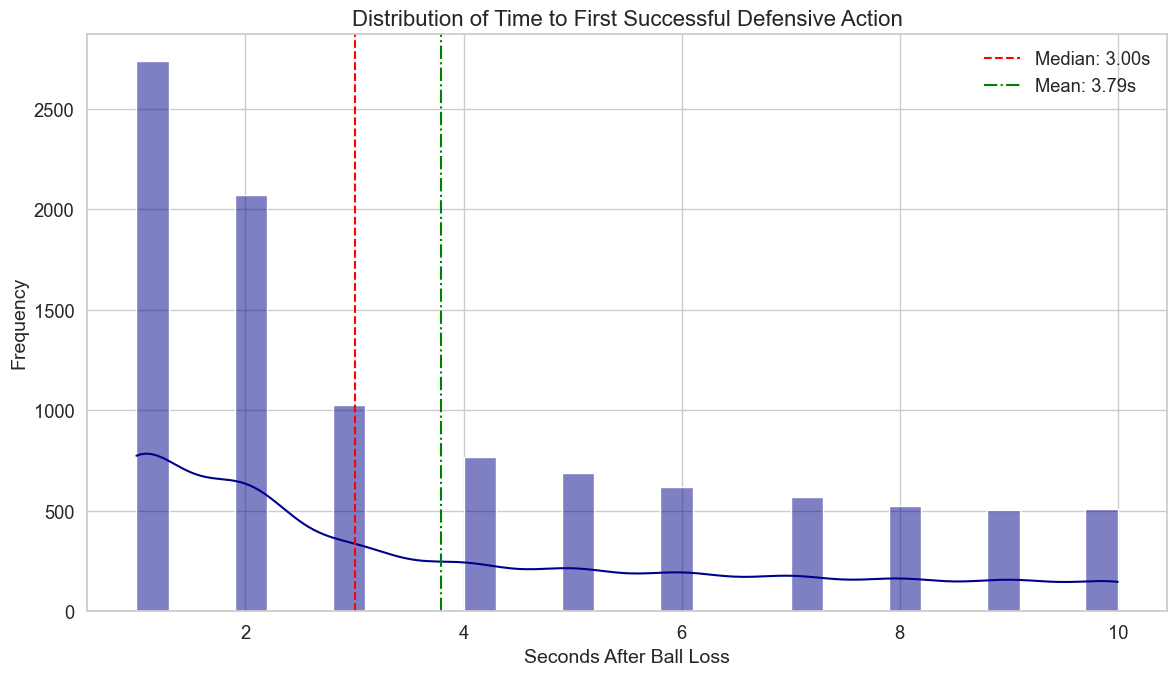

In [64]:
successful_defense = df[df['successful_defensive_action'] == True]

# Group by loss_event_id and get the minimum seconds_after_loss (first successful defensive action)
first_successful_action = successful_defense.groupby('loss_event_id')['seconds_after_loss'].min().reset_index()
first_successful_action = first_successful_action.rename(columns={'seconds_after_loss': 'time_to_first_defensive_action'})

plt.figure(figsize=(12, 7))
sns.histplot(data=first_successful_action, x='time_to_first_defensive_action', 
             bins=30, kde=True, color='darkblue')
plt.axvline(x=first_successful_action['time_to_first_defensive_action'].median(), 
           color='red', linestyle='--', label=f'Median: {first_successful_action["time_to_first_defensive_action"].median():.2f}s')
plt.axvline(x=first_successful_action['time_to_first_defensive_action'].mean(), 
           color='green', linestyle='-.', label=f'Mean: {first_successful_action["time_to_first_defensive_action"].mean():.2f}s')

plt.title('Distribution of Time to First Successful Defensive Action', fontsize=16)
plt.xlabel('Seconds After Ball Loss', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

team_reaction_times = df[df['successful_defensive_action'] == True].copy()
team_reaction_times = team_reaction_times.sort_values(['loss_event_id', 'seconds_after_loss'])
team_reaction_times = team_reaction_times.drop_duplicates(subset=['loss_event_id'], keep='first')

plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=team_reaction_times, x='team_name', y='seconds_after_loss',
                 palette='viridis', width=0.7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Defensive Reaction Times by Team', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Seconds to First Successful Defensive Action', fontsize=14)
plt.tight_layout()
plt.savefig('../visualisation/defensive_reaction_times_by_team.png', dpi=300, bbox_inches='tight')
plt.show()

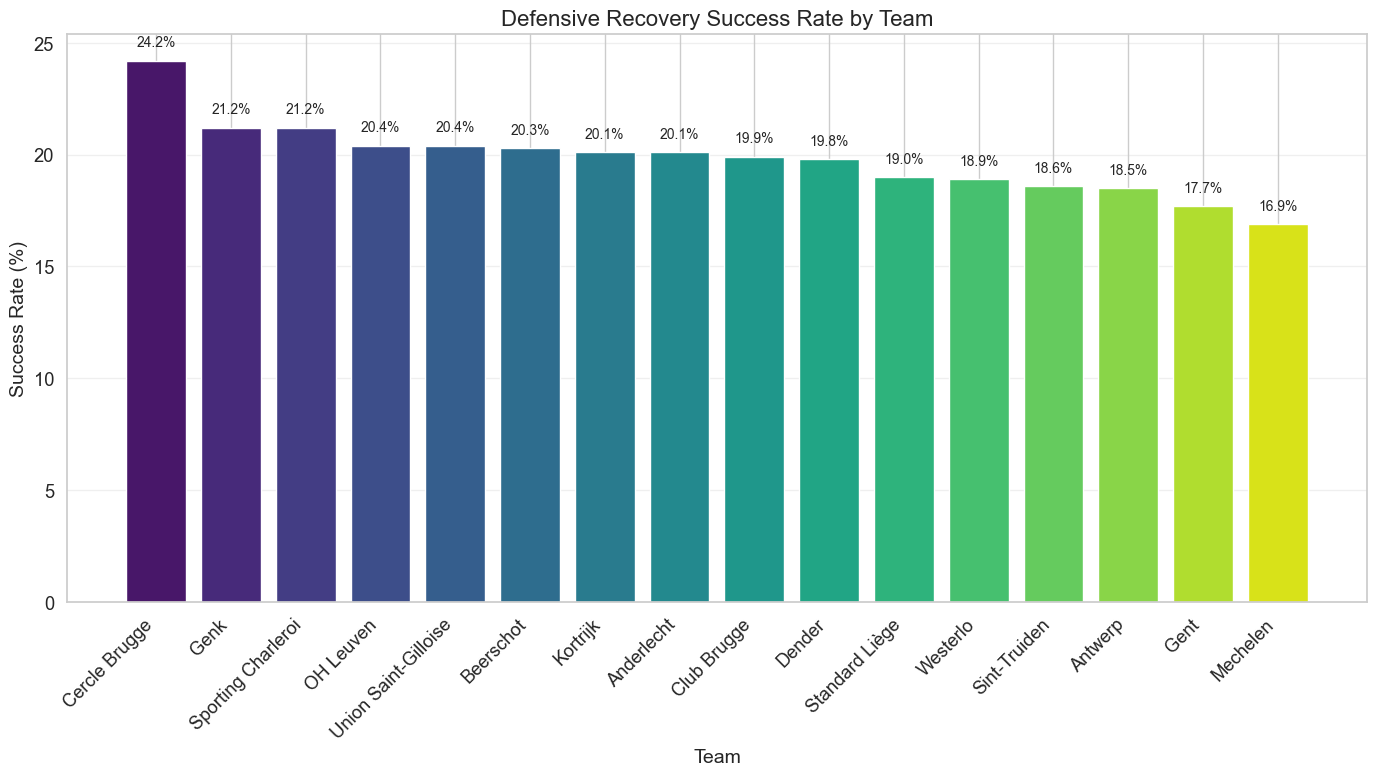

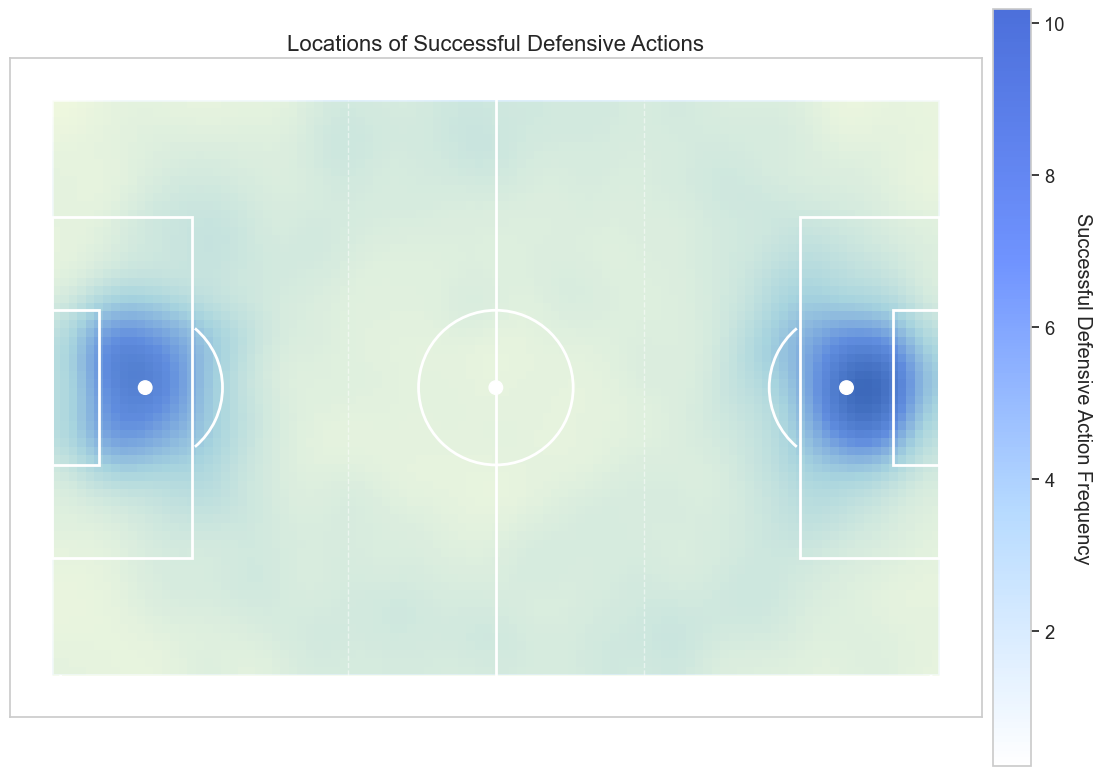

In [18]:
team_recovery = df.drop_duplicates(subset=['loss_event_id']).copy()
team_recovery_rates = team_recovery.groupby('team_name')['defensive_success'].agg(['count', 'sum'])
team_recovery_rates['success_rate'] = (team_recovery_rates['sum'] / team_recovery_rates['count'] * 100).round(1)
team_recovery_rates = team_recovery_rates.sort_values('success_rate', ascending=False).reset_index()

plt.figure(figsize=(14, 8))
bars = plt.bar(team_recovery_rates['team_name'], team_recovery_rates['success_rate'], 
               color=sns.color_palette("viridis", len(team_recovery_rates)))

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

plt.title('Defensive Recovery Success Rate by Team', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Success Rate (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../visualisation/defensive_recovery_success_rate_by_team.png', dpi=300, bbox_inches='tight')
plt.show()

successful_actions = df[df['successful_defensive_action'] == True].copy()

plt.figure(figsize=(12, 8))
ax = plt.subplot()
draw_pitch(ax)

heatmap_data = np.zeros((int(105), int(68)))

for _, row in successful_actions.iterrows():
    x, y = int(min(row['start_x'], 104)), int(min(row['start_y'], 67))
    heatmap_data[x, y] += 1

heatmap_data_smooth = gaussian_filter(heatmap_data, sigma=3)

cmap = LinearSegmentedColormap.from_list('white_to_blue', ['white', '#99CCFF', '#3366FF', '#0033CC'])

plt.imshow(heatmap_data_smooth.T, origin='lower', cmap=cmap, 
           extent=[0, 105, 0, 68], alpha=0.7)

cbar = plt.colorbar(pad=0.01)
cbar.set_label('Successful Defensive Action Frequency', rotation=270, labelpad=20)

plt.title('Locations of Successful Defensive Actions', fontsize=16)
plt.tight_layout()
plt.savefig('../visualisation/successful_defensive_action_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1400x800 with 0 Axes>

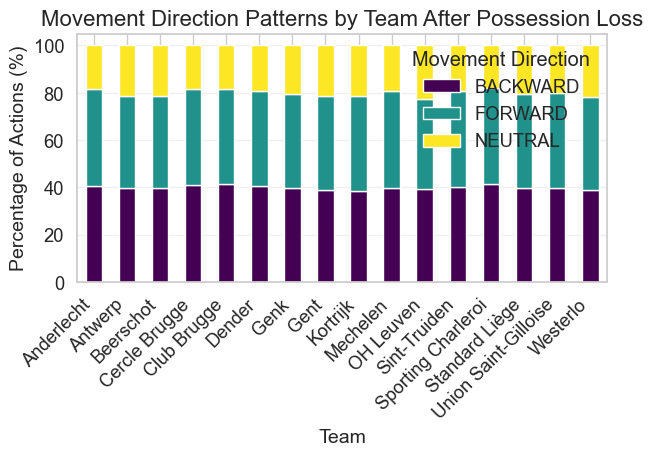

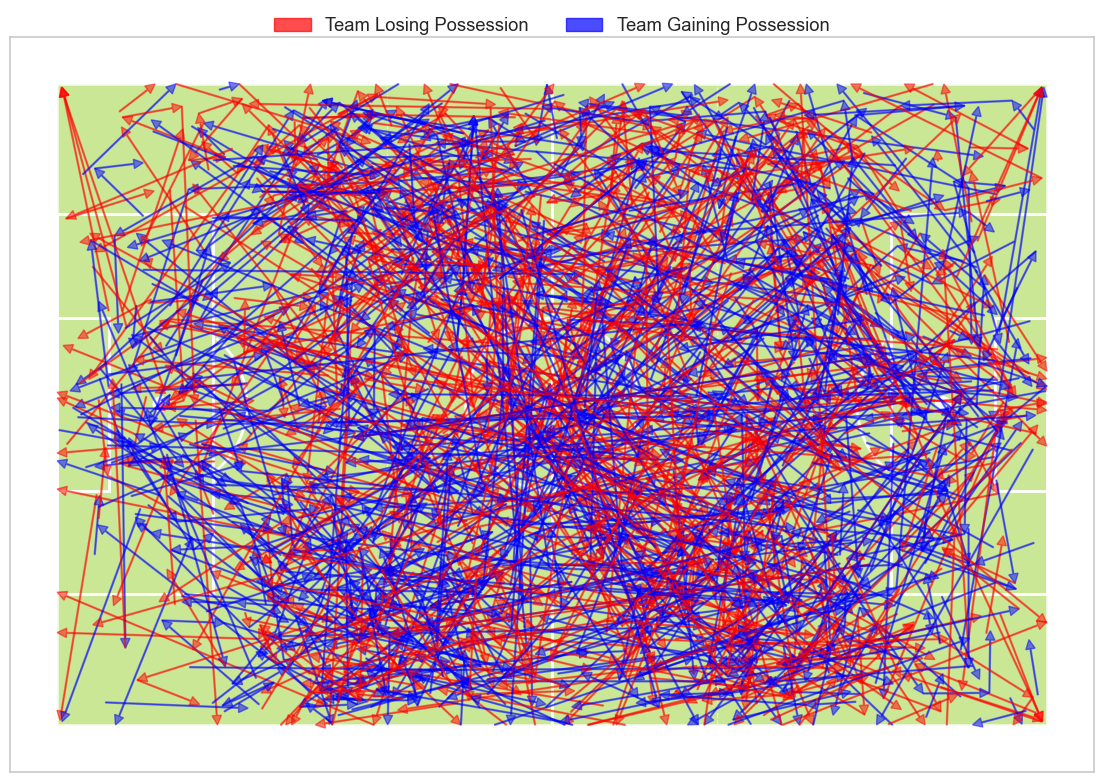

In [59]:
movement_directions = df.groupby(['team_name', 'movement_direction']).size().unstack(fill_value=0)
movement_directions_pct = movement_directions.div(movement_directions.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 8))
movement_directions_pct.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Movement Direction Patterns by Team After Possession Loss', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Percentage of Actions (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Movement Direction')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../visualisation/movement_direction_patterns_by_team.png', dpi=300, bbox_inches='tight')
plt.show()

sample_transitions = df.drop_duplicates(subset=['loss_event_id']).sample(n=min(500, df['loss_event_id'].nunique()), random_state=42)
sample_transitions_ids = sample_transitions['loss_event_id'].tolist()
sample_df = df[df['loss_event_id'].isin(sample_transitions_ids)]

plt.figure(figsize=(12, 8))
ax = plt.subplot()
draw_pitch(ax)

for _, row in sample_df.iterrows():
    dx = row['end_x'] - row['start_x']
    dy = row['end_y'] - row['start_y']
    
    if abs(dx) < 1 and abs(dy) < 1:
        continue
    
    color = 'red' if row['team_id'] == row['team_losing_ball'] else 'blue'
    
    plt.arrow(row['start_x'], row['start_y'], dx, dy, 
              color=color, alpha=0.5, width=0.1, 
              head_width=1, head_length=1, length_includes_head=True)

losing_team_patch = patches.Patch(color='red', label='Team Losing Possession', alpha=0.7)
gaining_team_patch = patches.Patch(color='blue', label='Team Gaining Possession', alpha=0.7)
plt.legend(handles=[losing_team_patch, gaining_team_patch], loc='upper center', 
           bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.tight_layout()
plt.savefig('../visualisation/movement_vectors_during_transitions.png', dpi=300, bbox_inches='tight')
plt.show()

In [28]:
zone_recovery = df.drop_duplicates(subset=['loss_event_id']).copy()
zone_recovery_rates = zone_recovery.groupby('loss_zone')['defensive_success'].agg(['count', 'sum'])
zone_recovery_rates['success_rate'] = (zone_recovery_rates['sum'] / zone_recovery_rates['count'] * 100).round(1)
zone_recovery_rates = zone_recovery_rates.sort_values('success_rate', ascending=False).reset_index()

plt.figure(figsize=(14, 8))
bars = plt.bar(zone_recovery_rates['loss_zone'], zone_recovery_rates['success_rate'], 
               color=sns.color_palette("viridis", len(zone_recovery_rates)))

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

plt.title('Defensive Recovery Success Rate by Field Zone', fontsize=16)
plt.xlabel('Field Zone', fontsize=14)
plt.ylabel('Success Rate (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../visualisation/defensive_recovery_success_rate_by_field_zone.png', dpi=300, bbox_inches='tight')
plt.show()

zone_movements = df.groupby(['loss_zone', 'movement_direction']).size().unstack(fill_value=0)
zone_movements_pct = zone_movements.div(zone_movements.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 10))
zone_movements_pct.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Movement Direction Patterns by Field Zone After Possession Loss', fontsize=16)
plt.xlabel('Field Zone', fontsize=14)
plt.ylabel('Percentage of Actions (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Movement Direction')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../visualisation/movement_direction_patterns_by_field_zone.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1400x1000 with 0 Axes>

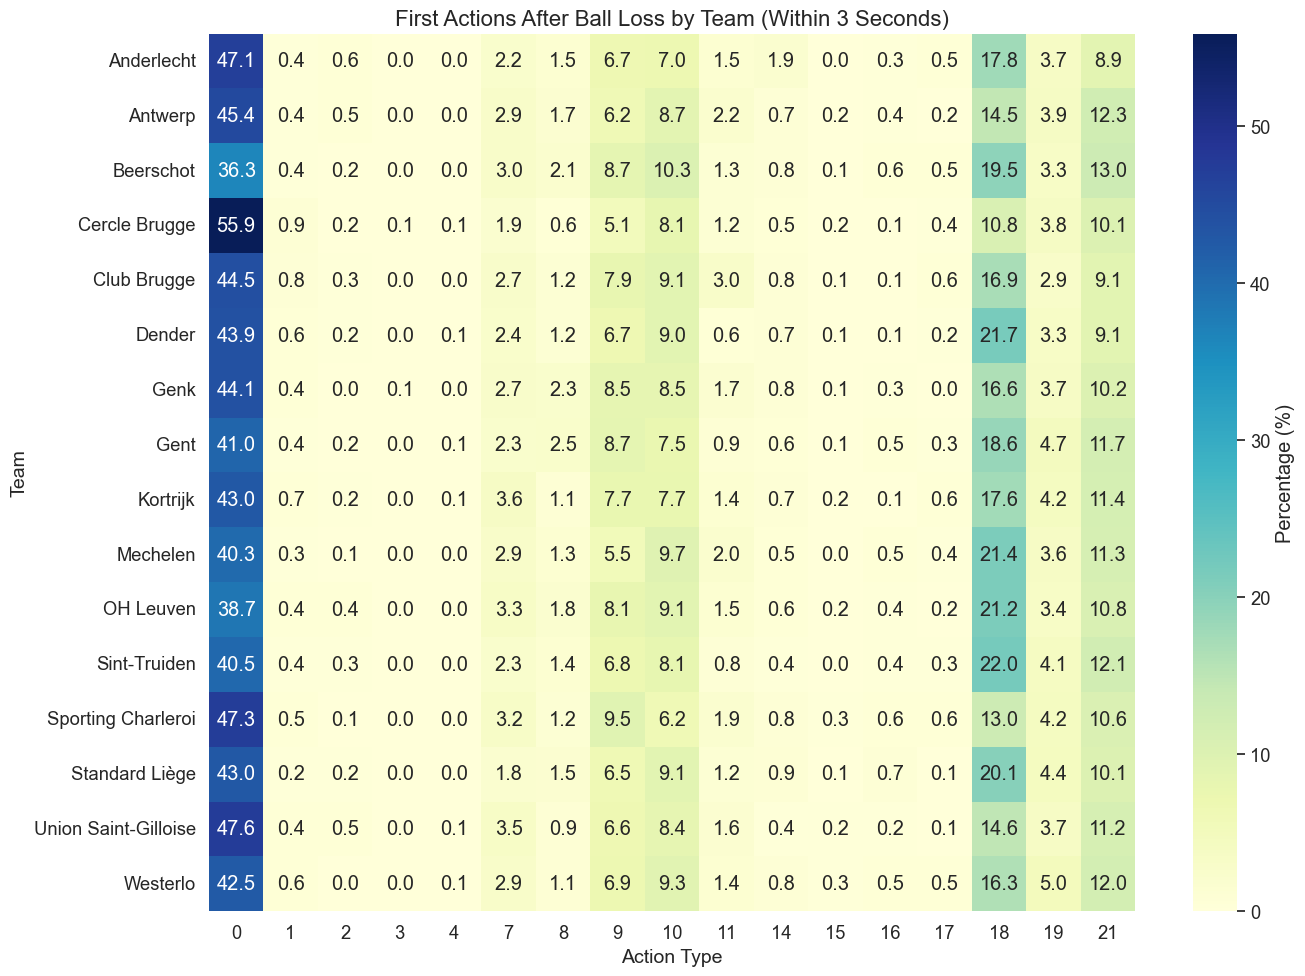

In [30]:
team_stats = df.groupby('team_name').agg({
    'seconds_after_loss': 'mean',
    'defensive_success': 'mean'
}).reset_index()

team_stats['defensive_success'] = team_stats['defensive_success'] * 100  # Convert to percentage

team_movement = df.groupby(['team_name', 'movement_direction']).size().unstack(fill_value=0)
team_movement['total'] = team_movement.sum(axis=1)
team_movement['forward_pct'] = (team_movement['FORWARD'] / team_movement['total'] * 100)
team_movement = team_movement.reset_index()

team_stats = pd.merge(team_stats, team_movement[['team_name', 'forward_pct']], on='team_name', how='left')

plt.figure(figsize=(14, 8))
scatter = plt.scatter(team_stats['forward_pct'], team_stats['defensive_success'], 
                      c=team_stats['seconds_after_loss'], cmap='coolwarm', 
                      s=100, alpha=0.8)

for i, row in team_stats.iterrows():
    plt.text(row['forward_pct']+0.5, row['defensive_success']+0.5, row['team_name'], 
             fontsize=9, ha='left', va='bottom')

cbar = plt.colorbar(scatter)
cbar.set_label('Average Seconds to Defensive Action', rotation=270, labelpad=20)

plt.axvline(x=team_stats['forward_pct'].median(), color='black', linestyle='--', alpha=0.3)
plt.axhline(y=team_stats['defensive_success'].median(), color='black', linestyle='--', alpha=0.3)

plt.text(team_stats['forward_pct'].max()*0.95, team_stats['defensive_success'].max()*0.95, 
         "Aggressive Counter-Press", fontsize=10, ha='right', va='top', 
         bbox=dict(facecolor='white', alpha=0.5))

plt.text(team_stats['forward_pct'].min()*1.05, team_stats['defensive_success'].max()*0.95, 
         "Defensive Block", fontsize=10, ha='left', va='top', 
         bbox=dict(facecolor='white', alpha=0.5))

plt.title('Team Defensive Transition Styles', fontsize=16)
plt.xlabel('Forward Movement Percentage (%)', fontsize=14)
plt.ylabel('Defensive Success Rate (%)', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../visualisation/team_defensive_transition_styles.png', dpi=300, bbox_inches='tight')
plt.show()

first_actions = df[df['seconds_after_loss'] <= 3].copy()
first_actions = first_actions.sort_values(['loss_event_id', 'seconds_after_loss'])
first_actions = first_actions.drop_duplicates(subset=['loss_event_id'], keep='first')

action_counts = pd.crosstab(first_actions['team_name'], first_actions['action_type'], normalize='index') * 100

plt.figure(figsize=(14, 10))
sns.heatmap(action_counts, cmap='YlGnBu', annot=True, fmt='.1f', cbar_kws={'label': 'Percentage (%)'})
plt.title('First Actions After Ball Loss by Team (Within 3 Seconds)', fontsize=16)
plt.xlabel('Action Type', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.tight_layout()
plt.savefig('../visualisation/first_actions_by_team.png', dpi=300, bbox_inches='tight')
plt.show()

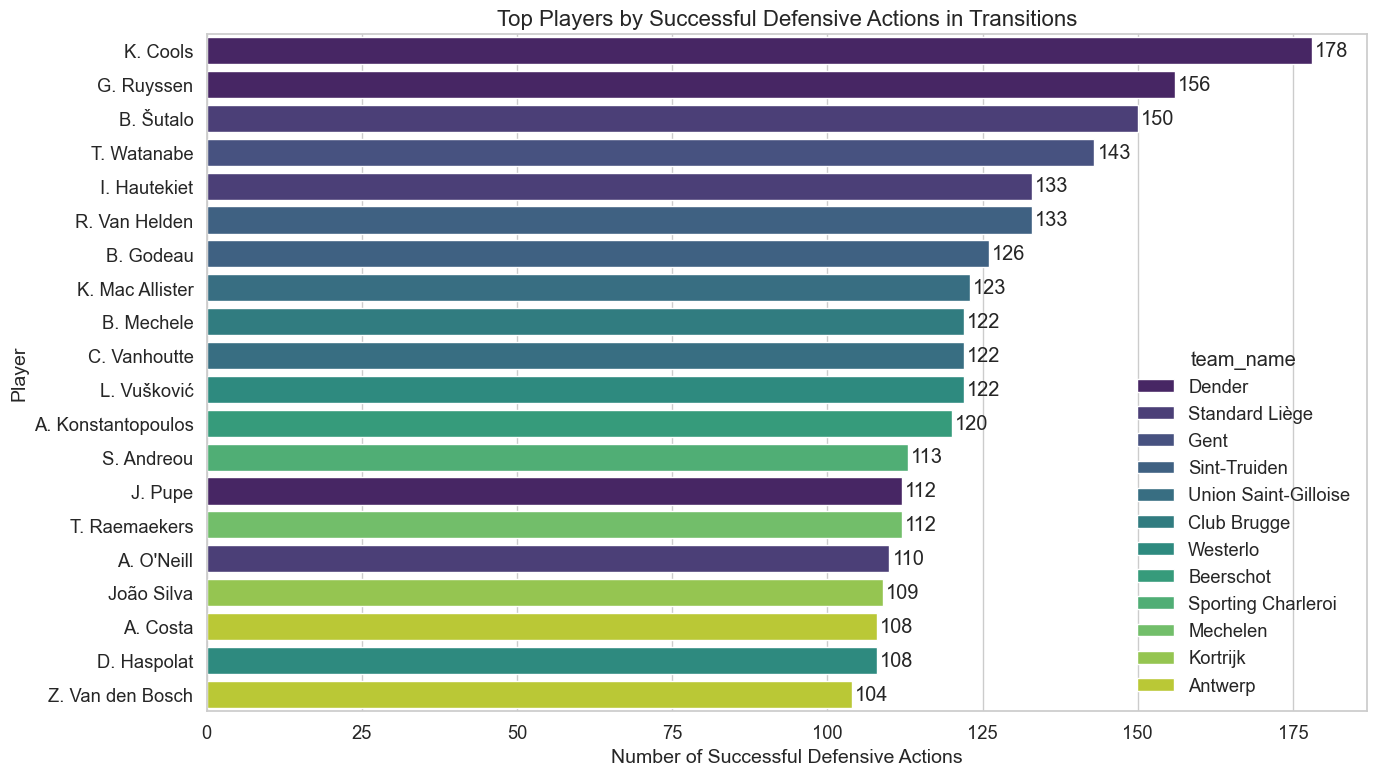

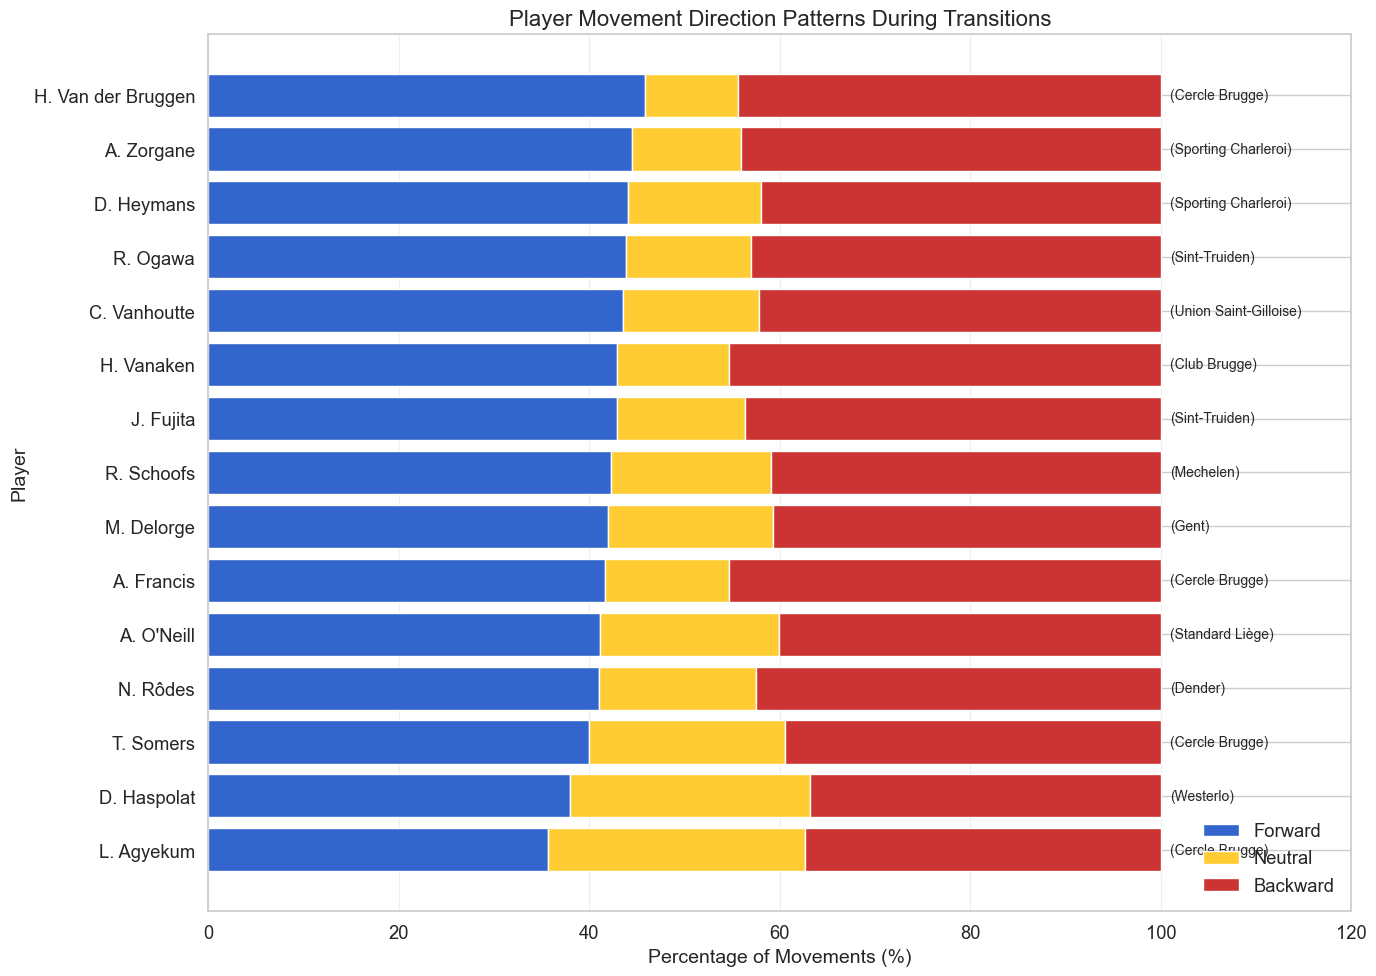

In [32]:
player_recovery = df[df['successful_defensive_action'] == True].copy()
player_success = player_recovery.groupby(['player_name', 'team_name']).size().reset_index(name='successful_actions')
player_success = player_success.sort_values('successful_actions', ascending=False).head(20)

plt.figure(figsize=(14, 8))
bars = sns.barplot(data=player_success, x='successful_actions', y='player_name', 
                   hue='team_name', palette='viridis', dodge=False)

for i, v in enumerate(player_success['successful_actions']):
    plt.text(v + 0.5, i, str(v), va='center')

plt.title('Top Players by Successful Defensive Actions in Transitions', fontsize=16)
plt.xlabel('Number of Successful Defensive Actions', fontsize=14)
plt.ylabel('Player', fontsize=14)
plt.tight_layout()
plt.savefig('../visualisation/top_players_successful_defensive_actions.png', dpi=300, bbox_inches='tight')
plt.show()

player_movement = df.groupby(['player_name', 'team_name', 'movement_direction']).size().unstack(fill_value=0)
player_movement = player_movement.reset_index()

player_movement['total_actions'] = player_movement[['FORWARD', 'BACKWARD', 'NEUTRAL']].sum(axis=1)
player_movement = player_movement[player_movement['total_actions'] >= 30]  # Only players with sufficient data
player_movement = player_movement.sort_values('FORWARD', ascending=False).head(15)

movement_cols = ['FORWARD', 'BACKWARD', 'NEUTRAL']
for col in movement_cols:
    player_movement[f'{col}_pct'] = player_movement[col] / player_movement['total_actions'] * 100

plt.figure(figsize=(14, 10))
player_movement = player_movement.sort_values('FORWARD_pct')

plt.barh(player_movement['player_name'], player_movement['FORWARD_pct'], color='#3366CC', label='Forward')
plt.barh(player_movement['player_name'], player_movement['NEUTRAL_pct'], left=player_movement['FORWARD_pct'], 
         color='#FFCC33', label='Neutral')
plt.barh(player_movement['player_name'], player_movement['BACKWARD_pct'], 
         left=player_movement['FORWARD_pct']+player_movement['NEUTRAL_pct'], color='#CC3333', label='Backward')

for i, player in enumerate(player_movement['player_name']):
    team = player_movement.loc[player_movement['player_name'] == player, 'team_name'].values[0]
    plt.text(101, i, f"({team})", va='center', ha='left', fontsize=10)

plt.title('Player Movement Direction Patterns During Transitions', fontsize=16)
plt.xlabel('Percentage of Movements (%)', fontsize=14)
plt.ylabel('Player', fontsize=14)
plt.xlim(0, 120)  # Make room for team names
plt.legend(loc='lower right')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('../visualisation/player_movement_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

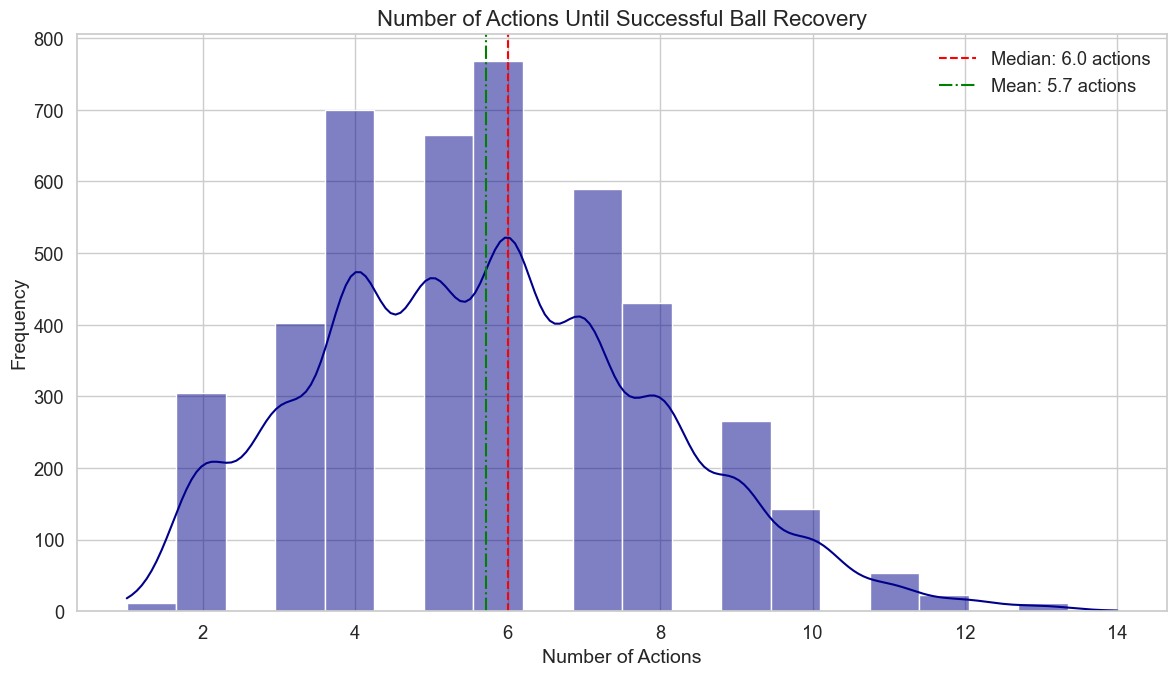

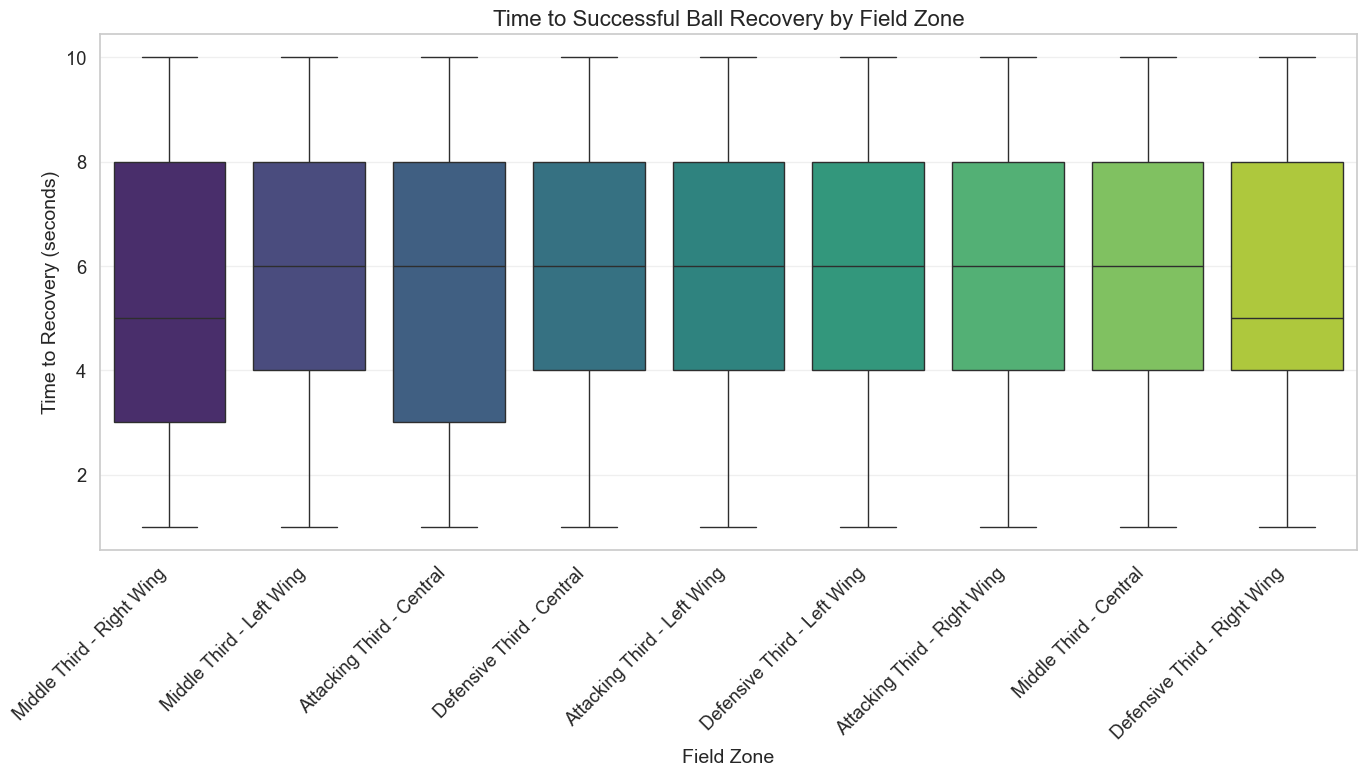

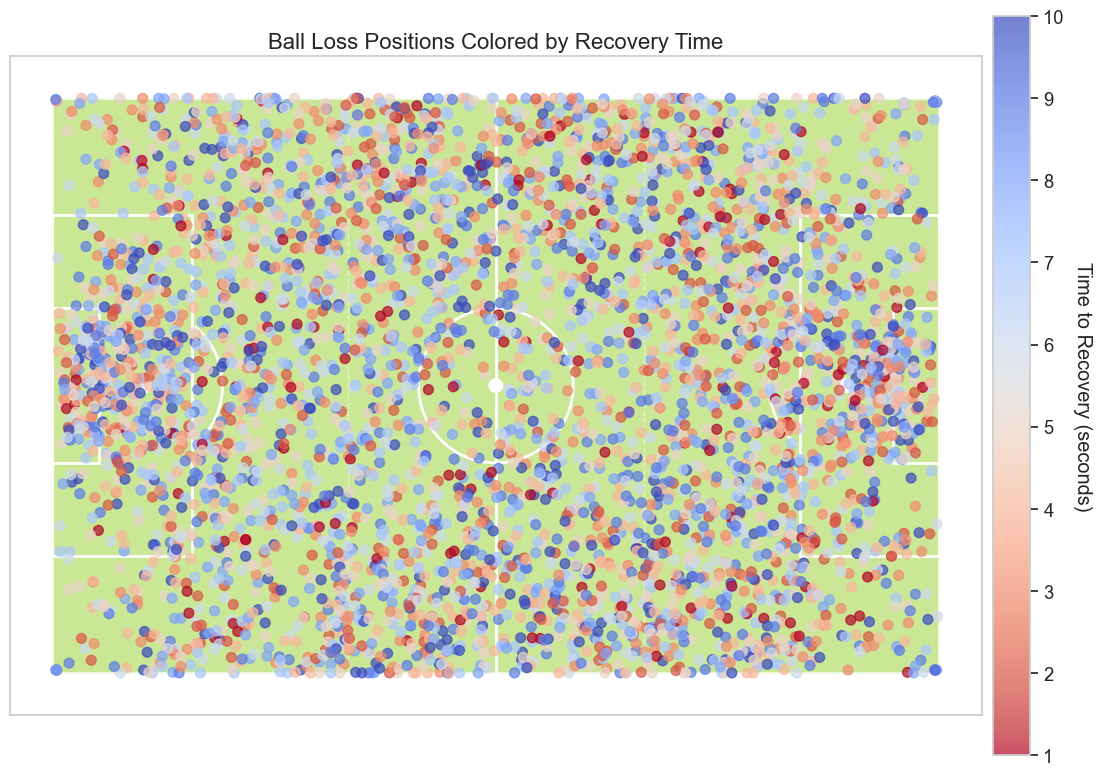

In [36]:
# Group transitions by loss_event_id and count actions until successful defense
transition_sequences = df.groupby('loss_event_id').agg({
    'action_id': 'count',
    'loss_zone': 'first',
    'team_losing_ball': 'first',
    'team_name': lambda x: x.iloc[0] if x.iloc[0] == x.iloc[0] else None,
    'defensive_success': 'max',
    'time_to_defensive_action': 'max'
}).reset_index()

transition_sequences['actions_count'] = transition_sequences['action_id']
transition_sequences = transition_sequences[transition_sequences['defensive_success']]

plt.figure(figsize=(12, 7))
sns.histplot(data=transition_sequences, x='actions_count', bins=20, kde=True, color='darkblue')
plt.axvline(x=transition_sequences['actions_count'].median(), 
           color='red', linestyle='--', label=f'Median: {transition_sequences["actions_count"].median():.1f} actions')
plt.axvline(x=transition_sequences['actions_count'].mean(), 
           color='green', linestyle='-.', label=f'Mean: {transition_sequences["actions_count"].mean():.1f} actions')

plt.title('Number of Actions Until Successful Ball Recovery', fontsize=16)
plt.xlabel('Number of Actions', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig('../visualisation/actions_until_successful_recovery.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=transition_sequences, x='loss_zone', y='time_to_defensive_action', palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.title('Time to Successful Ball Recovery by Field Zone', fontsize=16)
plt.xlabel('Field Zone', fontsize=14)
plt.ylabel('Time to Recovery (seconds)', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../visualisation/recovery_time_by_field_zone.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 8))
ax = plt.subplot()
draw_pitch(ax)

successful_transitions = df.drop_duplicates(subset=['loss_event_id'])
successful_transitions = successful_transitions[successful_transitions['defensive_success']]

scatter = plt.scatter(successful_transitions['loss_x'], successful_transitions['loss_y'], 
                     c=successful_transitions['time_to_defensive_action'], 
                     cmap='coolwarm_r', s=50, alpha=0.7)

cbar = plt.colorbar(scatter, pad=0.01)
cbar.set_label('Time to Recovery (seconds)', rotation=270, labelpad=20)

plt.title('Ball Loss Positions Colored by Recovery Time', fontsize=16)
plt.tight_layout()
plt.savefig('../visualisation/ball_loss_positions_recovery_time.png', dpi=300, bbox_inches='tight')
plt.show()

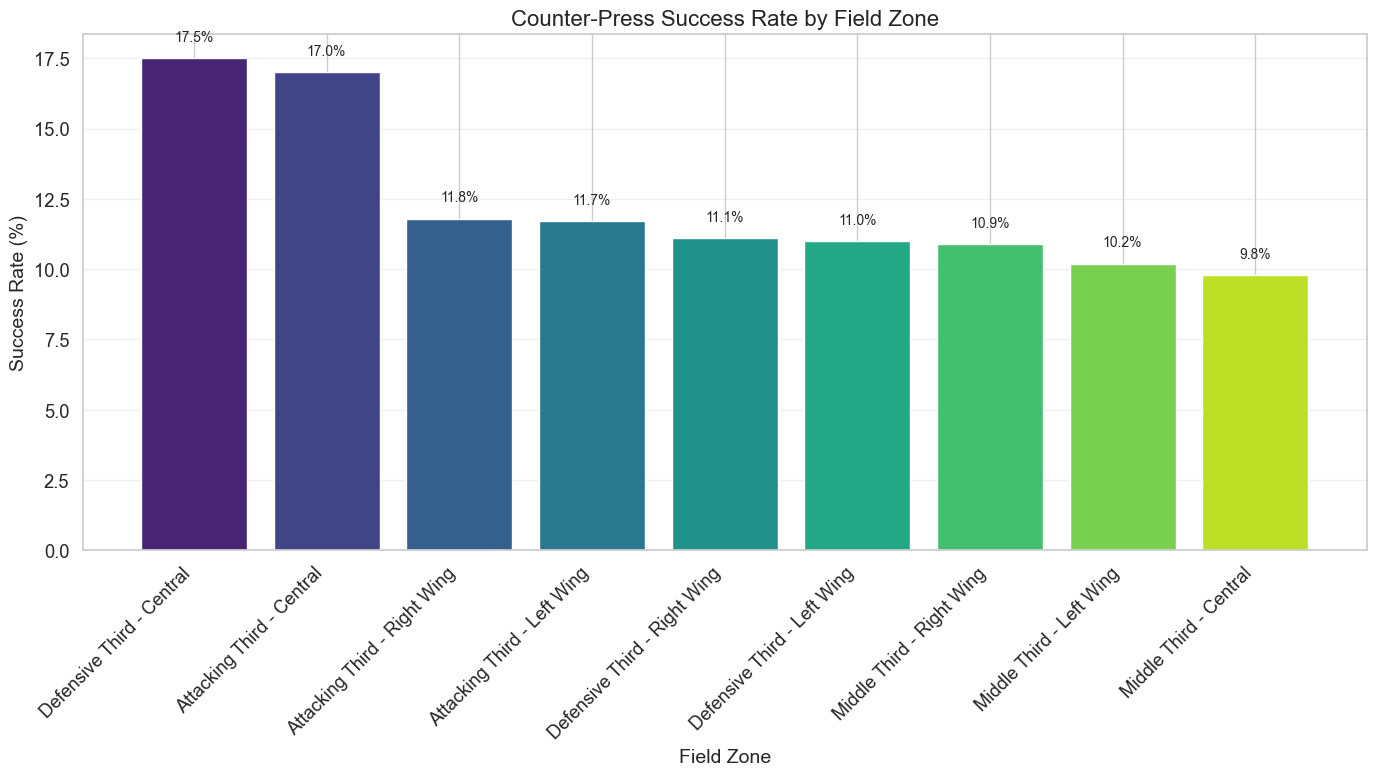

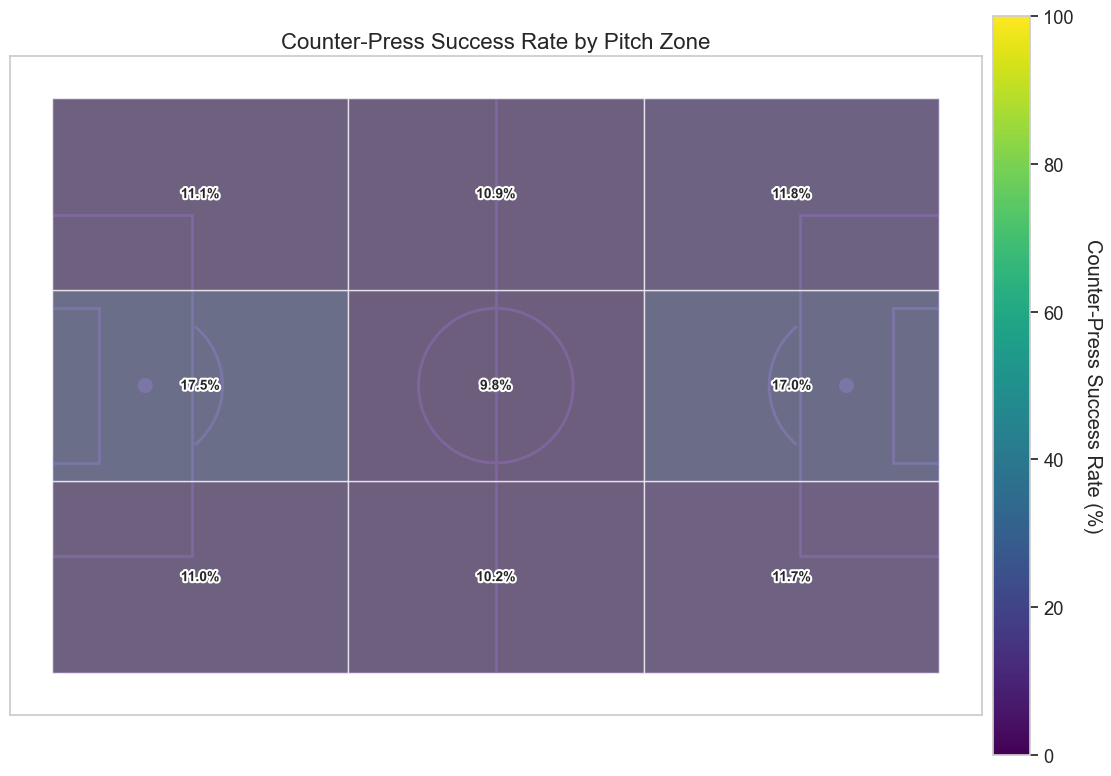

In [20]:
df['is_counter_press'] = df['seconds_after_loss'] <= 5
counter_press_actions = df[df['is_counter_press'] & (df['team_id'] == df['team_losing_ball'])]

counter_press_zone = counter_press_actions.groupby('loss_zone').agg({
    'successful_defensive_action': ['count', 'sum']
})
counter_press_zone.columns = ['total_counter_press', 'successful_counter_press']
counter_press_zone['success_rate'] = (counter_press_zone['successful_counter_press'] / 
                                     counter_press_zone['total_counter_press'] * 100).round(1)
counter_press_zone = counter_press_zone.reset_index()
counter_press_zone = counter_press_zone.sort_values('success_rate', ascending=False)

plt.figure(figsize=(14, 8))
bars = plt.bar(counter_press_zone['loss_zone'], counter_press_zone['success_rate'], 
               color=sns.color_palette("viridis", len(counter_press_zone)))

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

plt.title('Counter-Press Success Rate by Field Zone', fontsize=16)
plt.xlabel('Field Zone', fontsize=14)
plt.ylabel('Success Rate (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../visualisation/counter_press_success_rate_by_field_zone.png', dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
draw_pitch(ax)

x_zones = [0, 35, 70, 105]
y_zones = [0, 22.67, 45.33, 68]
zone_names = []

for i in range(len(x_zones)-1):
    for j in range(len(y_zones)-1):
        x_center = (x_zones[i] + x_zones[i+1]) / 2
        y_center = (y_zones[j] + y_zones[j+1]) / 2
        
        if x_zones[i] < 35:
            x_name = "Defensive Third"
        elif x_zones[i] < 70:
            x_name = "Middle Third"
        else:
            x_name = "Attacking Third"
            
        if y_zones[j] < 22.67:
            y_name = "Left Wing"
        elif y_zones[j] < 45.33:
            y_name = "Central"
        else:
            y_name = "Right Wing"
        
        zone_name = f"{x_name} - {y_name}"
        zone_names.append(zone_name)
        
        if zone_name in counter_press_zone['loss_zone'].values:
            success_rate = counter_press_zone.loc[counter_press_zone['loss_zone'] == zone_name, 'success_rate'].values[0]

            rect = patches.Rectangle((x_zones[i], y_zones[j]), 
                                     x_zones[i+1] - x_zones[i], 
                                     y_zones[j+1] - y_zones[j],
                                     alpha=0.7,
                                     facecolor=plt.cm.viridis(success_rate/100),
                                     edgecolor='white')
            ax.add_patch(rect)
            
            plt.text(x_center, y_center, f"{success_rate:.1f}%", 
                     ha='center', va='center', fontsize=10, fontweight='bold',
                     path_effects=[path_effects.withStroke(linewidth=3, foreground='white')])

norm = plt.Normalize(0, 100)
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, pad=0.01)
cbar.set_label('Counter-Press Success Rate (%)', rotation=270, labelpad=20)

plt.title('Counter-Press Success Rate by Pitch Zone', fontsize=16)
plt.tight_layout()
plt.savefig('../visualisation/counter_press_success_rate_by_pitch_zone.png', dpi=300, bbox_inches='tight')
plt.show()

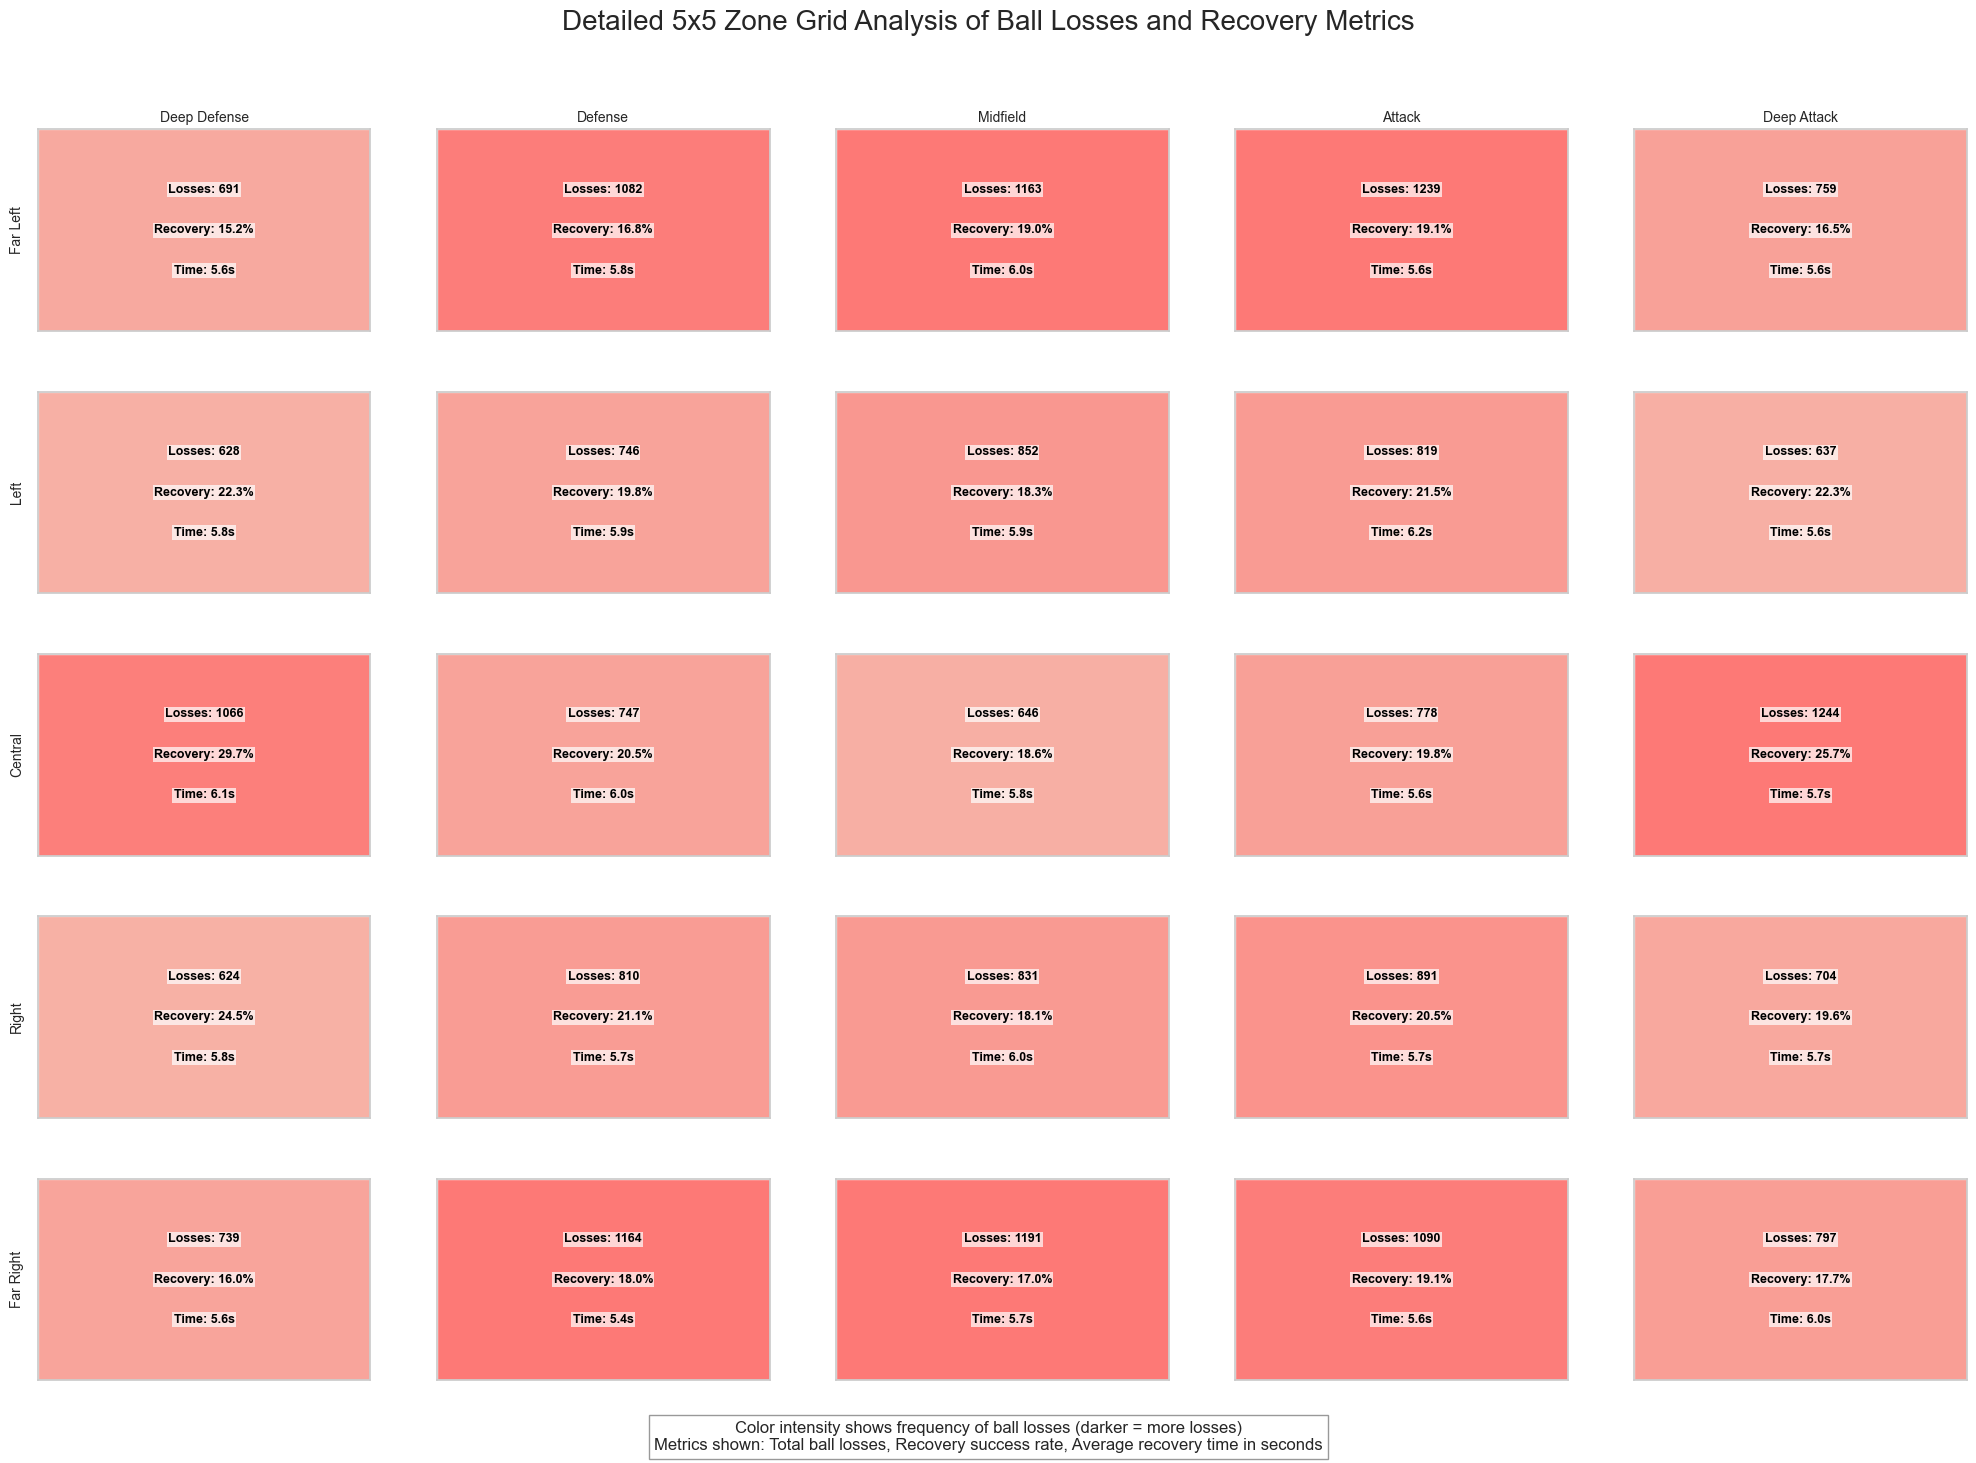

In [21]:
def categorize_detailed_zone(x, y):
    # X-axis (5 zones)
    if x < 21:
        x_zone = "Deep Defense"
    elif x < 42:
        x_zone = "Defense"
    elif x < 63:
        x_zone = "Midfield"
    elif x < 84:
        x_zone = "Attack"
    else:
        x_zone = "Deep Attack"
    
    # Y-axis (5 zones)
    if y < 13.6:
        y_zone = "Far Left"
    elif y < 27.2:
        y_zone = "Left"
    elif y < 40.8:
        y_zone = "Central"
    elif y < 54.4:
        y_zone = "Right"
    else:
        y_zone = "Far Right"
    
    return f"{x_zone} - {y_zone}"

df['detailed_zone'] = df.apply(lambda row: categorize_detailed_zone(row['loss_x'], row['loss_y']), axis=1)

zone_metrics = df.drop_duplicates(subset=['loss_event_id']).groupby('detailed_zone').agg({
    'loss_event_id': 'count',
    'defensive_success': 'mean',
    'time_to_defensive_action': lambda x: x[x.notnull()].mean()
}).reset_index()

zone_metrics.rename(columns={
    'loss_event_id': 'ball_losses',
    'defensive_success': 'recovery_rate',
    'time_to_defensive_action': 'avg_recovery_time'
}, inplace=True)

zone_metrics['recovery_rate'] = zone_metrics['recovery_rate'] * 100

plt.figure(figsize=(20, 16))
grid_size = (5, 5)

x_zones = ["Deep Defense", "Defense", "Midfield", "Attack", "Deep Attack"]
y_zones = ["Far Left", "Left", "Central", "Right", "Far Right"]

grid_data = {}
for metric in ['ball_losses', 'recovery_rate', 'avg_recovery_time']:
    grid_data[metric] = np.zeros(grid_size)

for i, x_zone in enumerate(x_zones):
    for j, y_zone in enumerate(y_zones):
        zone_name = f"{x_zone} - {y_zone}"
        if zone_name in zone_metrics['detailed_zone'].values:
            zone_row = zone_metrics[zone_metrics['detailed_zone'] == zone_name]
            grid_data['ball_losses'][j, i] = zone_row['ball_losses'].values[0]
            grid_data['recovery_rate'][j, i] = zone_row['recovery_rate'].values[0]
            grid_data['avg_recovery_time'][j, i] = zone_row['avg_recovery_time'].values[0] if not np.isnan(zone_row['avg_recovery_time'].values[0]) else 0

gs = GridSpec(5, 5, figure=plt.gcf())

def draw_mini_pitch(ax):
    rect = patches.Rectangle((0, 0), 1, 1, linewidth=1, 
                           edgecolor='white', facecolor='#B3DE69', alpha=0.2)
    ax.add_patch(rect)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])

for i in range(5):
    for j in range(5):
        ax = plt.subplot(gs[j, i])
        draw_mini_pitch(ax)
        
        zone_name = f"{x_zones[i]} - {y_zones[j]}"
        
        losses = grid_data['ball_losses'][j, i]
        recovery = grid_data['recovery_rate'][j, i]
        time = grid_data['avg_recovery_time'][j, i]
        
        alpha = min(losses / grid_data['ball_losses'].max(), 0.9)
        rect = patches.Rectangle((0, 0), 1, 1, linewidth=1, 
                               edgecolor='white', facecolor='#FF6B6B', alpha=alpha)
        ax.add_patch(rect)
        
        if losses > 0:
            plt.text(0.5, 0.7, f"Losses: {int(losses)}", ha='center', va='center', fontsize=9, 
                    fontweight='bold', color='black', 
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))
            
            plt.text(0.5, 0.5, f"Recovery: {recovery:.1f}%", ha='center', va='center', fontsize=9, 
                    fontweight='bold', color='black', 
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))
            
            if time > 0:
                plt.text(0.5, 0.3, f"Time: {time:.1f}s", ha='center', va='center', fontsize=9, 
                        fontweight='bold', color='black', 
                        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))
        
        if j == 0:
            plt.title(x_zones[i], fontsize=10, pad=5)
        if i == 0:
            plt.ylabel(y_zones[j], fontsize=10, labelpad=10)

plt.suptitle('Detailed 5x5 Zone Grid Analysis of Ball Losses and Recovery Metrics', fontsize=20, y=0.92)

plt.figtext(0.5, 0.02, 'Color intensity shows frequency of ball losses (darker = more losses)\nMetrics shown: Total ball losses, Recovery success rate, Average recovery time in seconds', 
          ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.tight_layout(rect=[0, 0.05, 1, 0.9])
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.savefig('../visualisation/5x5_zone_grid_analysis.png', dpi=300, bbox_inches='tight')  
plt.show()

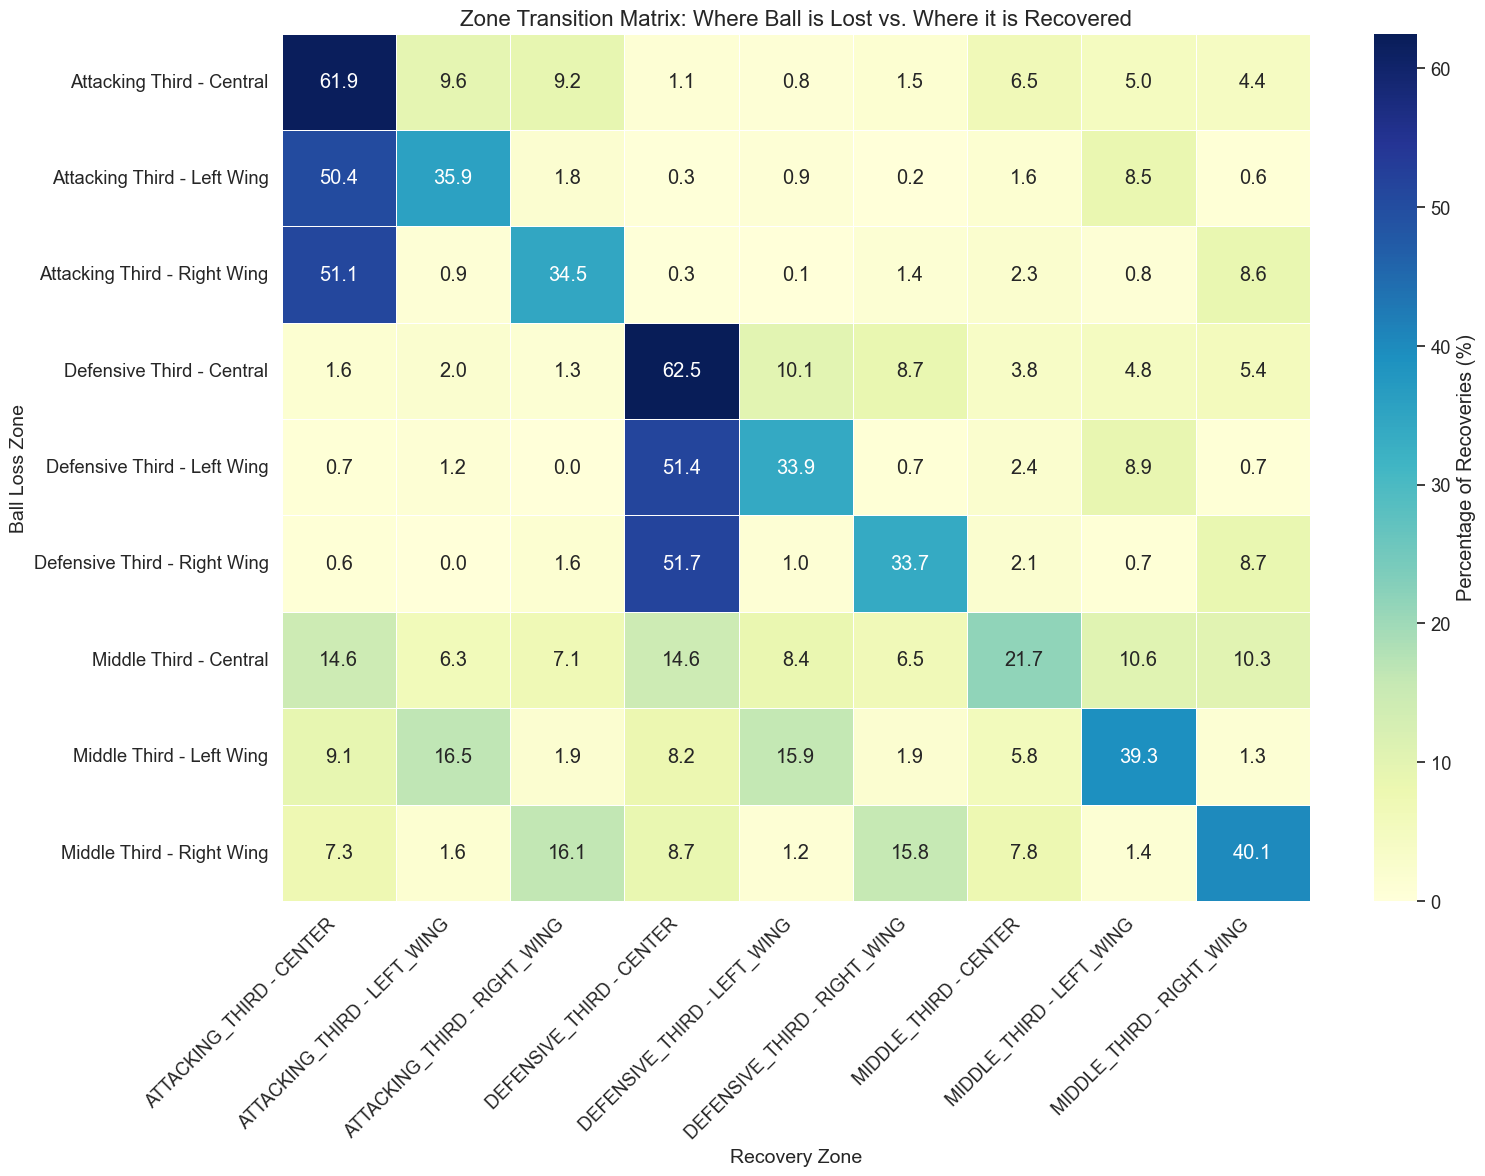

In [22]:
successful_transitions = df[df['successful_defensive_action'] == True].copy()

loss_zones = df.drop_duplicates(subset=['loss_event_id'])[['loss_event_id', 'loss_zone']]
recovery_zones = successful_transitions.groupby('loss_event_id').apply(
    lambda x: x.loc[x['seconds_after_loss'] == x['seconds_after_loss'].min(), 'x_sector'].iloc[0] + " - " + 
              x.loc[x['seconds_after_loss'] == x['seconds_after_loss'].min(), 'y_sector'].iloc[0]
).reset_index(name='recovery_zone')

zone_flow = pd.merge(loss_zones, recovery_zones, on='loss_event_id', how='inner')

transition_matrix = pd.crosstab(zone_flow['loss_zone'], zone_flow['recovery_zone'], normalize='index') * 100

plt.figure(figsize=(16, 12))
sns.heatmap(transition_matrix, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5,
           cbar_kws={'label': 'Percentage of Recoveries (%)'})
plt.title('Zone Transition Matrix: Where Ball is Lost vs. Where it is Recovered', fontsize=16)
plt.xlabel('Recovery Zone', fontsize=14)
plt.ylabel('Ball Loss Zone', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('../visualisation/zone_transition_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

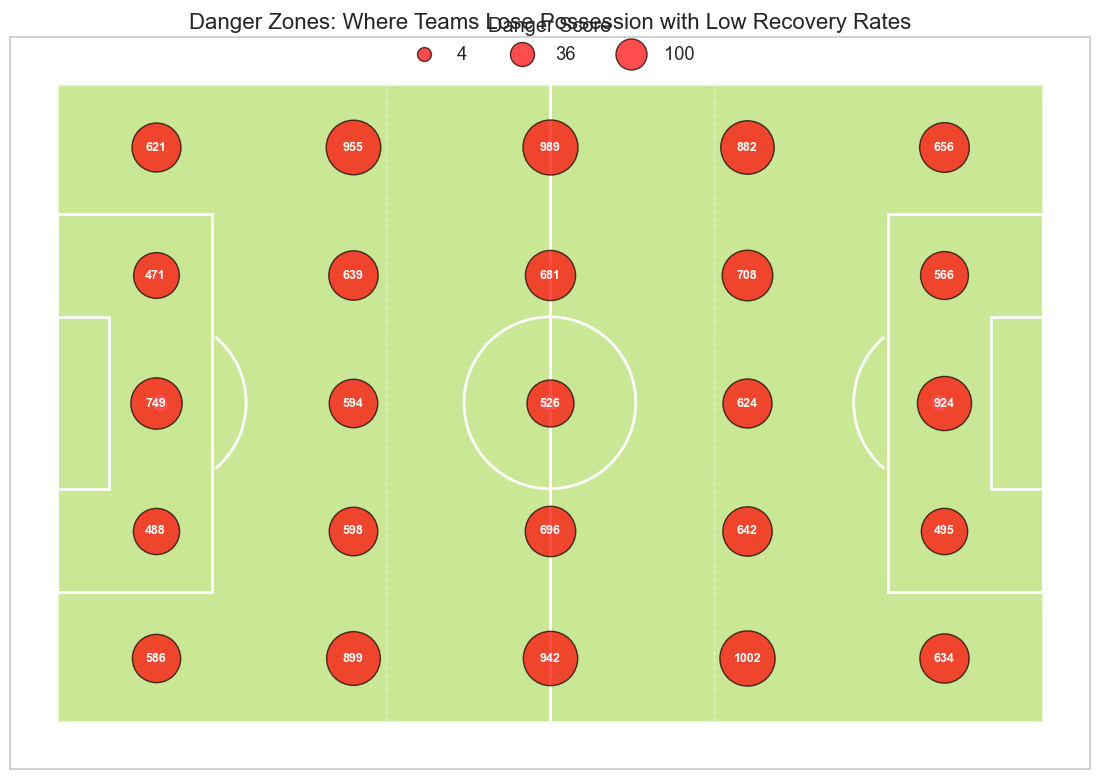

In [25]:
danger_zones = zone_metrics.copy()
danger_zones['danger_score'] = (100 - danger_zones['recovery_rate']) * danger_zones['ball_losses'] / 100

plt.figure(figsize=(12, 8))
ax = plt.subplot()
draw_pitch(ax)

zone_coords = {}
x_centers = [10.5, 31.5, 52.5, 73.5, 94.5]  # Centers of x zones
y_centers = [6.8, 20.4, 34, 47.6, 61.2]     # Centers of y zones

for i, x_zone in enumerate(x_zones):
    for j, y_zone in enumerate(y_zones):
        zone_name = f"{x_zone} - {y_zone}"
        zone_coords[zone_name] = (x_centers[i], y_centers[j])

for _, row in danger_zones.iterrows():
    zone_name = row['detailed_zone']
    if zone_name in zone_coords:
        x, y = zone_coords[zone_name]
        danger = row['danger_score']
        if danger > 0:
            size = np.sqrt(danger) * 50  # Scale for visibility
            plt.scatter(x, y, s=size, alpha=0.7, color='red', edgecolors='black')
            if danger > danger_zones['danger_score'].max() * 0.3:  # Only label significant zones
                plt.text(x, y, f"{int(danger)}", ha='center', va='center', fontsize=9, fontweight='bold',
                       color='white')

sizes = [100, 300, 500]
labels = []
for size in sizes:
    danger = (size / 50) ** 2
    labels.append(f"{int(danger)}")

legend_elements = [plt.scatter([], [], s=size, color='red', edgecolors='black', alpha=0.7, 
                              label=label) for size, label in zip(sizes, labels)]
plt.legend(handles=legend_elements, title="Danger Score", loc='upper center', 
           bbox_to_anchor=(0.5, 1.05), ncol=3)

plt.title('Danger Zones: Where Teams Lose Possession with Low Recovery Rates', fontsize=16)
plt.tight_layout()
plt.savefig('../visualisation/danger_zones.png', dpi=300, bbox_inches='tight')
plt.show()

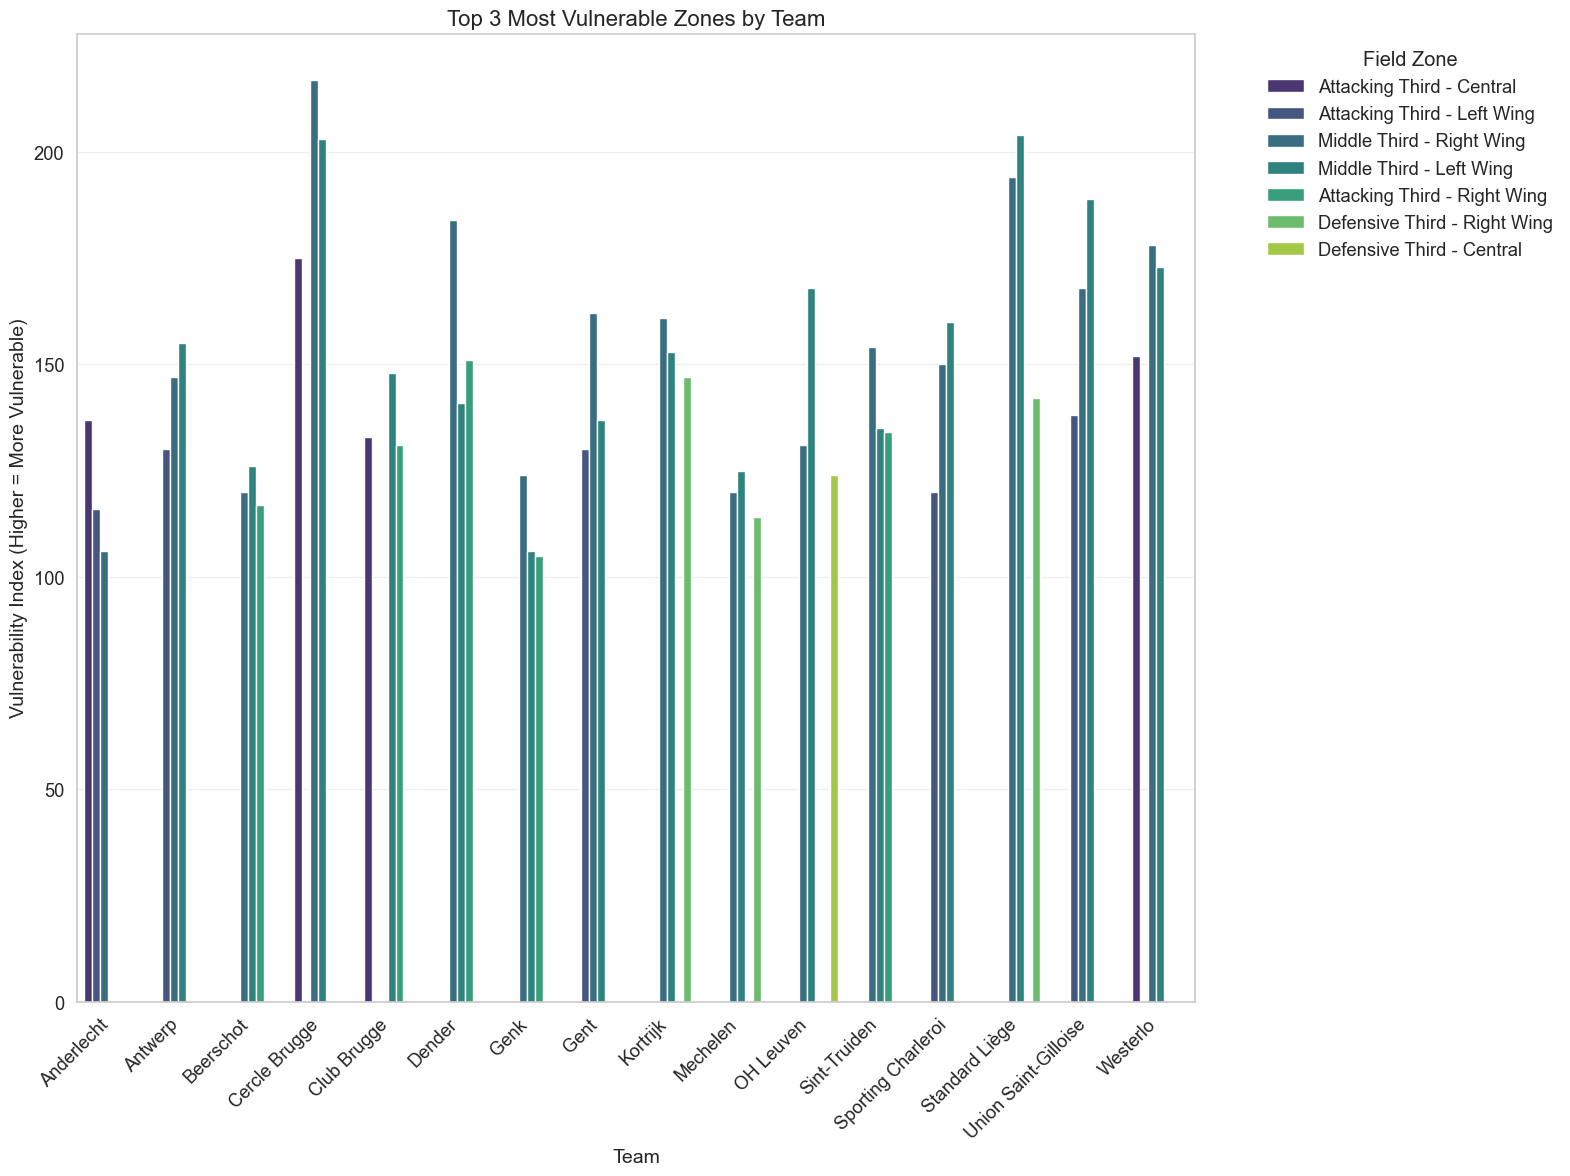

In [27]:
team_vulnerability = df.drop_duplicates(subset=['loss_event_id']).groupby(['team_name', 'loss_zone']).agg({
    'loss_event_id': 'count',
    'defensive_success': 'mean'
}).reset_index()

team_vulnerability.rename(columns={
    'loss_event_id': 'ball_losses',
    'defensive_success': 'recovery_rate'
}, inplace=True)

team_vulnerability['recovery_rate'] = team_vulnerability['recovery_rate'] * 100
team_vulnerability['vulnerability_index'] = (100 - team_vulnerability['recovery_rate']) * team_vulnerability['ball_losses'] / 100

top_vulnerable_zones = team_vulnerability.sort_values(['team_name', 'vulnerability_index'], ascending=[True, False])
top_vulnerable_zones = top_vulnerable_zones.groupby('team_name').head(3).reset_index()

plt.figure(figsize=(16, 12))
team_colors = sns.color_palette("husl", len(top_vulnerable_zones['team_name'].unique()))
color_dict = dict(zip(top_vulnerable_zones['team_name'].unique(), team_colors))

ax = sns.barplot(data=top_vulnerable_zones, x='team_name', y='vulnerability_index', 
                hue='loss_zone', palette='viridis')

plt.title('Top 3 Most Vulnerable Zones by Team', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Vulnerability Index (Higher = More Vulnerable)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Field Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../visualisation/top_vulnerable_zones_by_team.png', dpi=300, bbox_inches='tight')
plt.show()

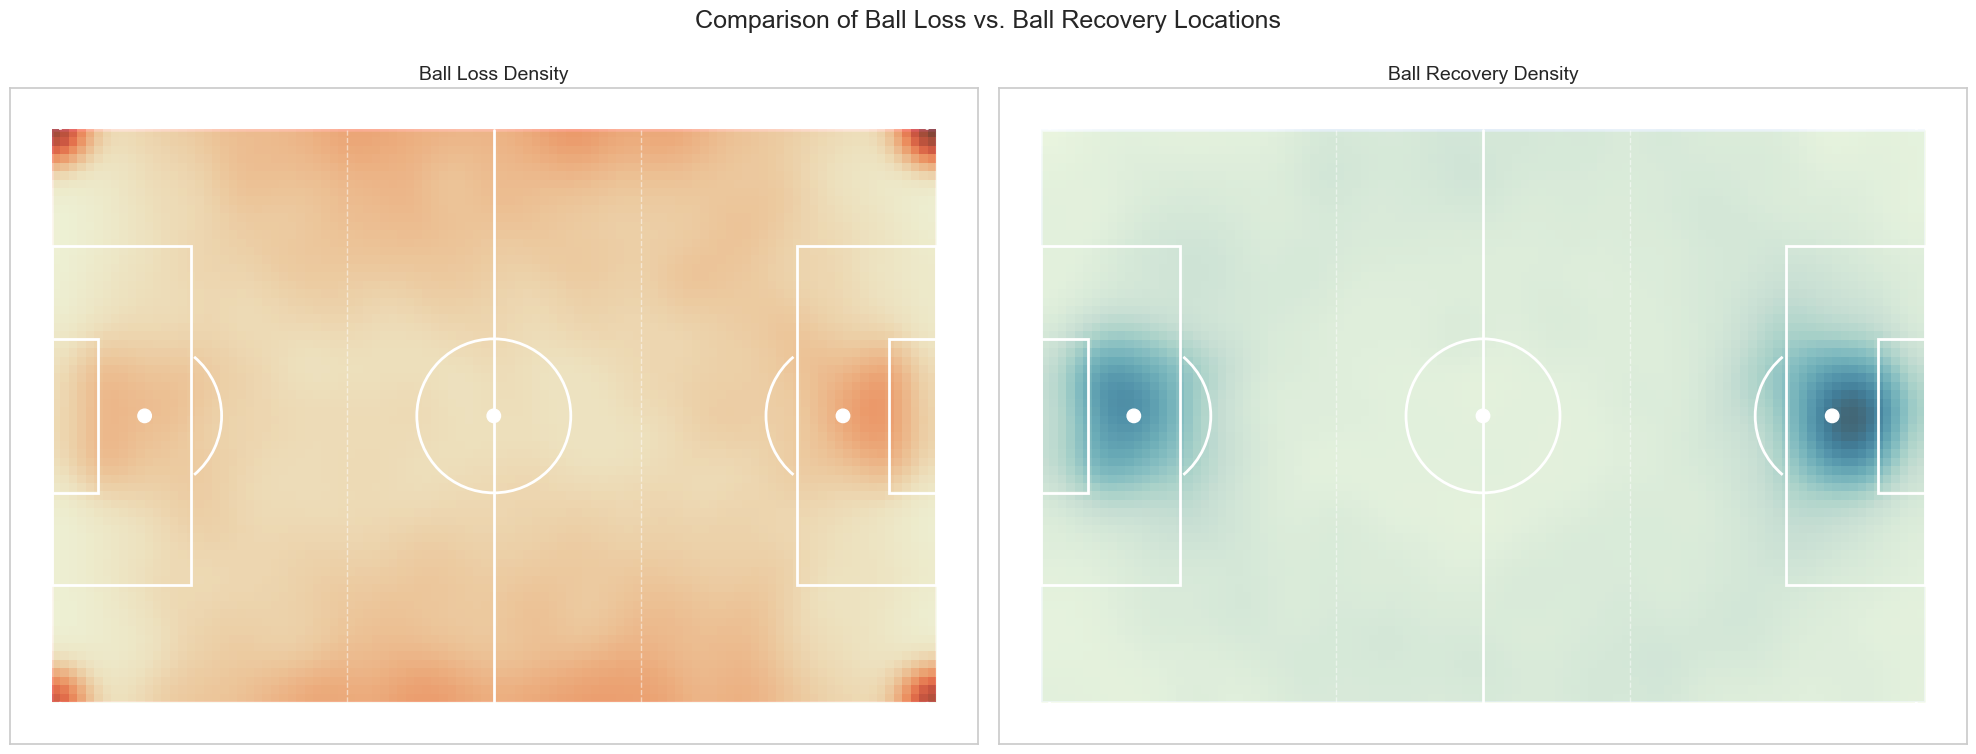

In [34]:
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(1, 2, 1)
draw_pitch(ax1)

loss_data = df.drop_duplicates(subset=['loss_event_id'])
loss_heatmap = np.zeros((int(105), int(68)))

for _, row in loss_data.iterrows():
    x, y = int(min(row['loss_x'], 104)), int(min(row['loss_y'], 67))
    loss_heatmap[x, y] += 1

loss_heatmap_smooth = gaussian_filter(loss_heatmap, sigma=3)
ax1.imshow(loss_heatmap_smooth.T, origin='lower', cmap='Reds', 
         extent=[0, 105, 0, 68], alpha=0.7)
ax1.set_title('Ball Loss Density', fontsize=14)

ax2 = plt.subplot(1, 2, 2)
draw_pitch(ax2)

recovery_data = df[df['successful_defensive_action'] == True]
recovery_heatmap = np.zeros((int(105), int(68)))

for _, row in recovery_data.iterrows():
    x, y = int(min(row['start_x'], 104)), int(min(row['start_y'], 67))
    recovery_heatmap[x, y] += 1

recovery_heatmap_smooth = gaussian_filter(recovery_heatmap, sigma=3)
im = ax2.imshow(recovery_heatmap_smooth.T, origin='lower', cmap='Blues', 
              extent=[0, 105, 0, 68], alpha=0.7)
ax2.set_title('Ball Recovery Density', fontsize=14)

plt.suptitle('Comparison of Ball Loss vs. Ball Recovery Locations', fontsize=18)
plt.tight_layout()
plt.savefig('../visualisation/ball_loss_vs_recovery_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

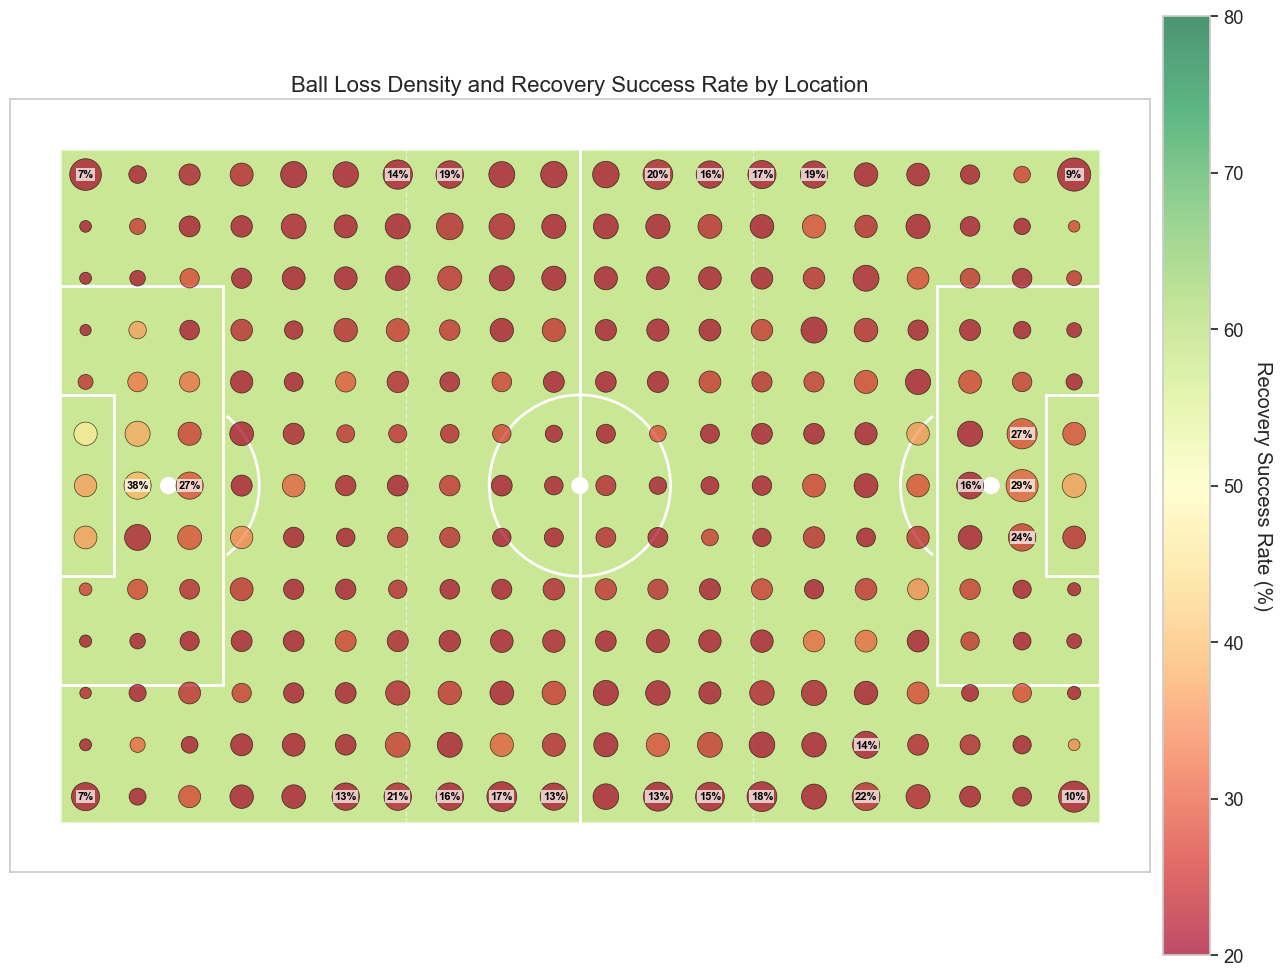

In [36]:
plt.figure(figsize=(14, 10))
ax = plt.subplot()
draw_pitch(ax)

x_bins = np.linspace(0, 105, 21)
y_bins = np.linspace(0, 68, 14)

loss_data = df.drop_duplicates(subset=['loss_event_id']).copy()
loss_data['x_bin'] = pd.cut(loss_data['loss_x'], bins=x_bins, labels=False, include_lowest=True)
loss_data['y_bin'] = pd.cut(loss_data['loss_y'], bins=y_bins, labels=False, include_lowest=True)

bin_success = loss_data.groupby(['x_bin', 'y_bin'])['defensive_success'].agg(['count', 'mean']).reset_index()
bin_success.columns = ['x_bin', 'y_bin', 'count', 'success_rate']
bin_success['success_rate'] = bin_success['success_rate'] * 100

bin_success['x_center'] = x_bins[bin_success['x_bin'].astype(int)] + (x_bins[1] - x_bins[0])/2
bin_success['y_center'] = y_bins[bin_success['y_bin'].astype(int)] + (y_bins[1] - y_bins[0])/2

bin_success = bin_success[bin_success['count'] >= 5]

scatter = plt.scatter(bin_success['x_center'], bin_success['y_center'], 
                     s=bin_success['count']*3, c=bin_success['success_rate'], 
                     cmap='RdYlGn', vmin=20, vmax=80, alpha=0.7, edgecolors='black', linewidth=0.5)

cbar = plt.colorbar(scatter, pad=0.01)
cbar.set_label('Recovery Success Rate (%)', rotation=270, labelpad=20)

for _, row in bin_success[bin_success['count'] > bin_success['count'].quantile(0.9)].iterrows():
    plt.text(row['x_center'], row['y_center'], f"{int(row['success_rate'])}%", 
             ha='center', va='center', fontsize=8, fontweight='bold', color='black',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

plt.title('Ball Loss Density and Recovery Success Rate by Location', fontsize=16)
plt.tight_layout()
plt.show()

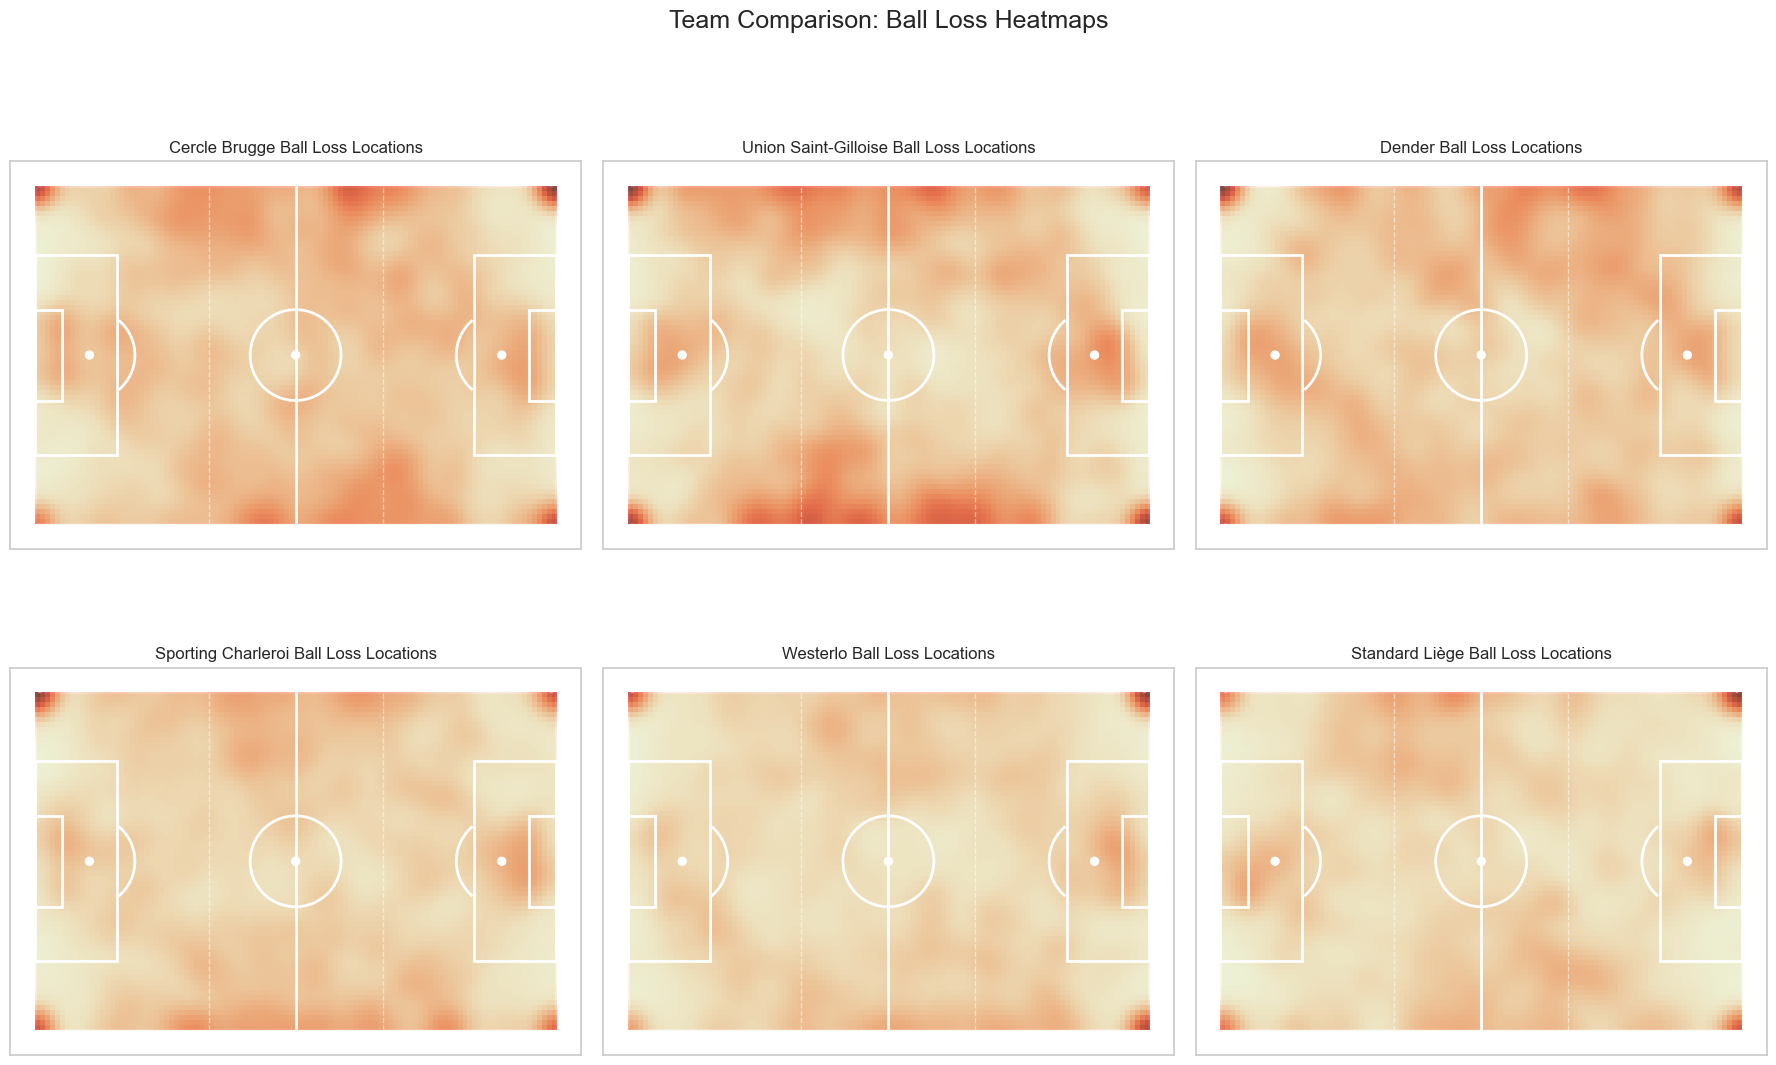

In [41]:
top_teams = df['team_name'].value_counts().head(6).index.tolist()

plt.figure(figsize=(18, 12))
for i, team in enumerate(top_teams):
    ax = plt.subplot(2, 3, i+1)
    draw_pitch(ax)
    
    team_loss_data = df[df['team_name'] == team].drop_duplicates(subset=['loss_event_id'])
    team_heatmap = np.zeros((int(105), int(68)))
    
    for _, row in team_loss_data.iterrows():
        x, y = int(min(row['loss_x'], 104)), int(min(row['loss_y'], 67))
        team_heatmap[x, y] += 1
    
    team_heatmap_smooth = gaussian_filter(team_heatmap, sigma=3)
    ax.imshow(team_heatmap_smooth.T, origin='lower', cmap='Reds', 
            extent=[0, 105, 0, 68], alpha=0.7)
    ax.set_title(f'{team} Ball Loss Locations', fontsize=12)

plt.suptitle('Team Comparison: Ball Loss Heatmaps', fontsize=18)
plt.tight_layout()
plt.savefig('../visualisation/team_ball_loss_heatmaps.png', dpi=300, bbox_inches='tight')
plt.show()

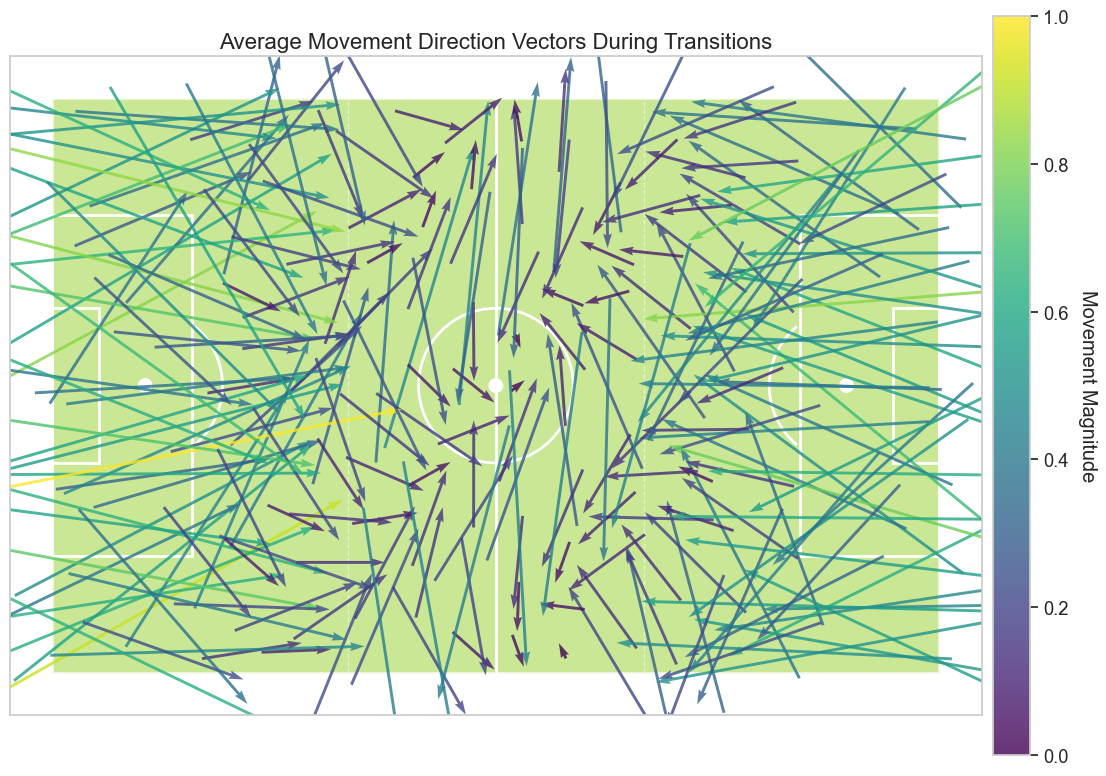

In [42]:
plt.figure(figsize=(12, 8))
ax = plt.subplot()
draw_pitch(ax)

x_grid = np.linspace(0, 105, 21)
y_grid = np.linspace(0, 68, 14)
u_grid = np.zeros((len(x_grid)-1, len(y_grid)-1))
v_grid = np.zeros((len(x_grid)-1, len(y_grid)-1))
count_grid = np.zeros((len(x_grid)-1, len(y_grid)-1))

for _, row in df.iterrows():
    dx = row['end_x'] - row['start_x']
    dy = row['end_y'] - row['start_y']
    
    if abs(dx) < 1 and abs(dy) < 1:
        continue
    
    x_idx = np.searchsorted(x_grid, row['start_x']) - 1
    y_idx = np.searchsorted(y_grid, row['start_y']) - 1
    
    if 0 <= x_idx < len(x_grid)-1 and 0 <= y_idx < len(y_grid)-1:
        u_grid[x_idx, y_idx] += dx
        v_grid[x_idx, y_idx] += dy
        count_grid[x_idx, y_idx] += 1

with np.errstate(divide='ignore', invalid='ignore'):
    u_avg = np.where(count_grid > 0, u_grid / count_grid, 0)
    v_avg = np.where(count_grid > 0, v_grid / count_grid, 0)

x_centers = (x_grid[:-1] + x_grid[1:]) / 2
y_centers = (y_grid[:-1] + y_grid[1:]) / 2
X, Y = np.meshgrid(x_centers, y_centers)

magnitudes = np.sqrt(u_avg**2 + v_avg**2).T
normalized_magnitudes = np.zeros_like(magnitudes)
mask = magnitudes > 0
if mask.any():
    normalized_magnitudes[mask] = (magnitudes[mask] - magnitudes[mask].min()) / (magnitudes[mask].max() - magnitudes[mask].min())

quiver = ax.quiver(X, Y.T, u_avg.T, v_avg.T, normalized_magnitudes, 
                 cmap='viridis', scale=30, width=0.003, pivot='mid', alpha=0.8)

cbar = plt.colorbar(quiver, pad=0.01)
cbar.set_label('Movement Magnitude', rotation=270, labelpad=20)

plt.title('Average Movement Direction Vectors During Transitions', fontsize=16)
plt.tight_layout()
plt.savefig('../visualisation/average_movement_vectors.png', dpi=300, bbox_inches='tight')
plt.show()

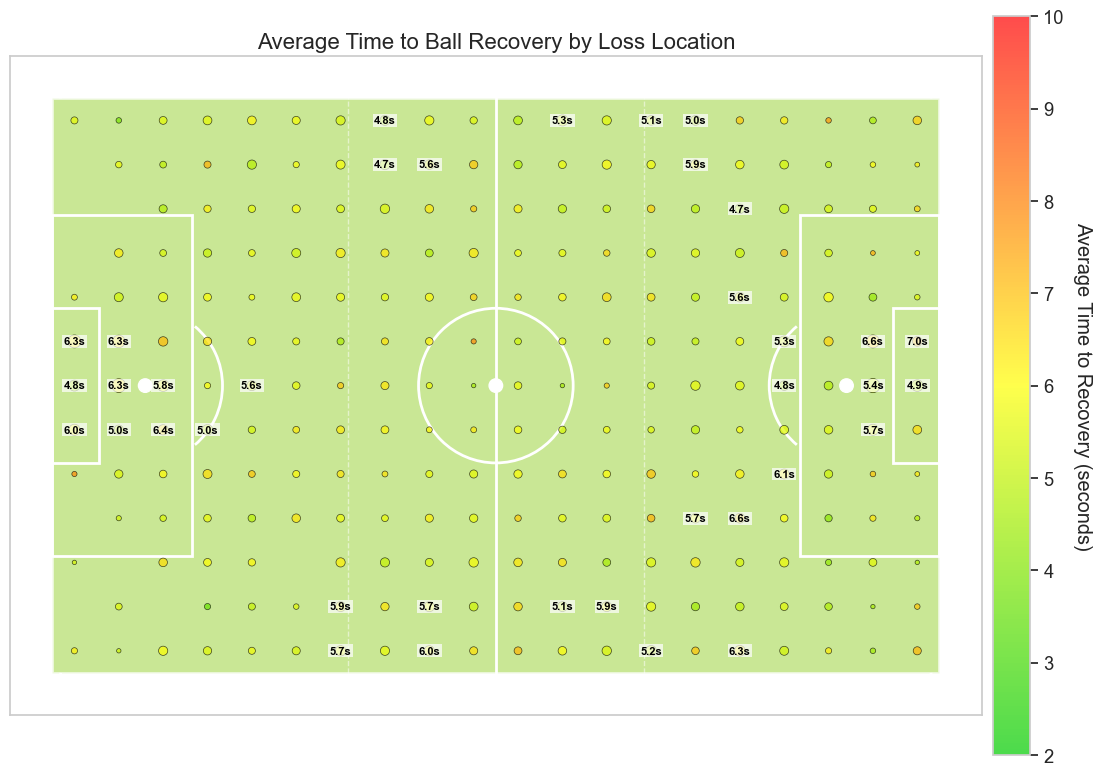

In [45]:
plt.figure(figsize=(12, 8))
ax = plt.subplot()
draw_pitch(ax)

recovery_time_data = df.drop_duplicates(subset=['loss_event_id']).copy()
recovery_time_data = recovery_time_data[recovery_time_data['time_to_defensive_action'].notnull()]

recovery_time_data['x_bin'] = pd.cut(recovery_time_data['loss_x'], bins=x_bins, labels=False, include_lowest=True)
recovery_time_data['y_bin'] = pd.cut(recovery_time_data['loss_y'], bins=y_bins, labels=False, include_lowest=True)

bin_recovery_time = recovery_time_data.groupby(['x_bin', 'y_bin'])['time_to_defensive_action'].agg(['mean', 'count']).reset_index()
bin_recovery_time.columns = ['x_bin', 'y_bin', 'avg_time', 'count']

bin_recovery_time['x_center'] = x_bins[bin_recovery_time['x_bin'].astype(int)] + (x_bins[1] - x_bins[0])/2
bin_recovery_time['y_center'] = y_bins[bin_recovery_time['y_bin'].astype(int)] + (y_bins[1] - y_bins[0])/2

bin_recovery_time = bin_recovery_time[bin_recovery_time['count'] >= 5]

cmap = LinearSegmentedColormap.from_list('recovery_time', ['#00CC00', '#FFFF00', '#FF0000'])

scatter = plt.scatter(bin_recovery_time['x_center'], bin_recovery_time['y_center'], 
                     s=bin_recovery_time['count']*2, c=bin_recovery_time['avg_time'], 
                     cmap=cmap, vmin=2, vmax=10, alpha=0.7, edgecolors='black', linewidth=0.5)

cbar = plt.colorbar(scatter, pad=0.01)
cbar.set_label('Average Time to Recovery (seconds)', rotation=270, labelpad=20)

for _, row in bin_recovery_time[bin_recovery_time['count'] > bin_recovery_time['count'].quantile(0.85)].iterrows():
    plt.text(row['x_center'], row['y_center'], f"{row['avg_time']:.1f}s", 
             ha='center', va='center', fontsize=8, fontweight='bold', color='black',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

plt.title('Average Time to Ball Recovery by Loss Location', fontsize=16)
plt.tight_layout()
plt.savefig('../visualisation/average_recovery_time_by_location.png', dpi=300, bbox_inches='tight')
plt.show()

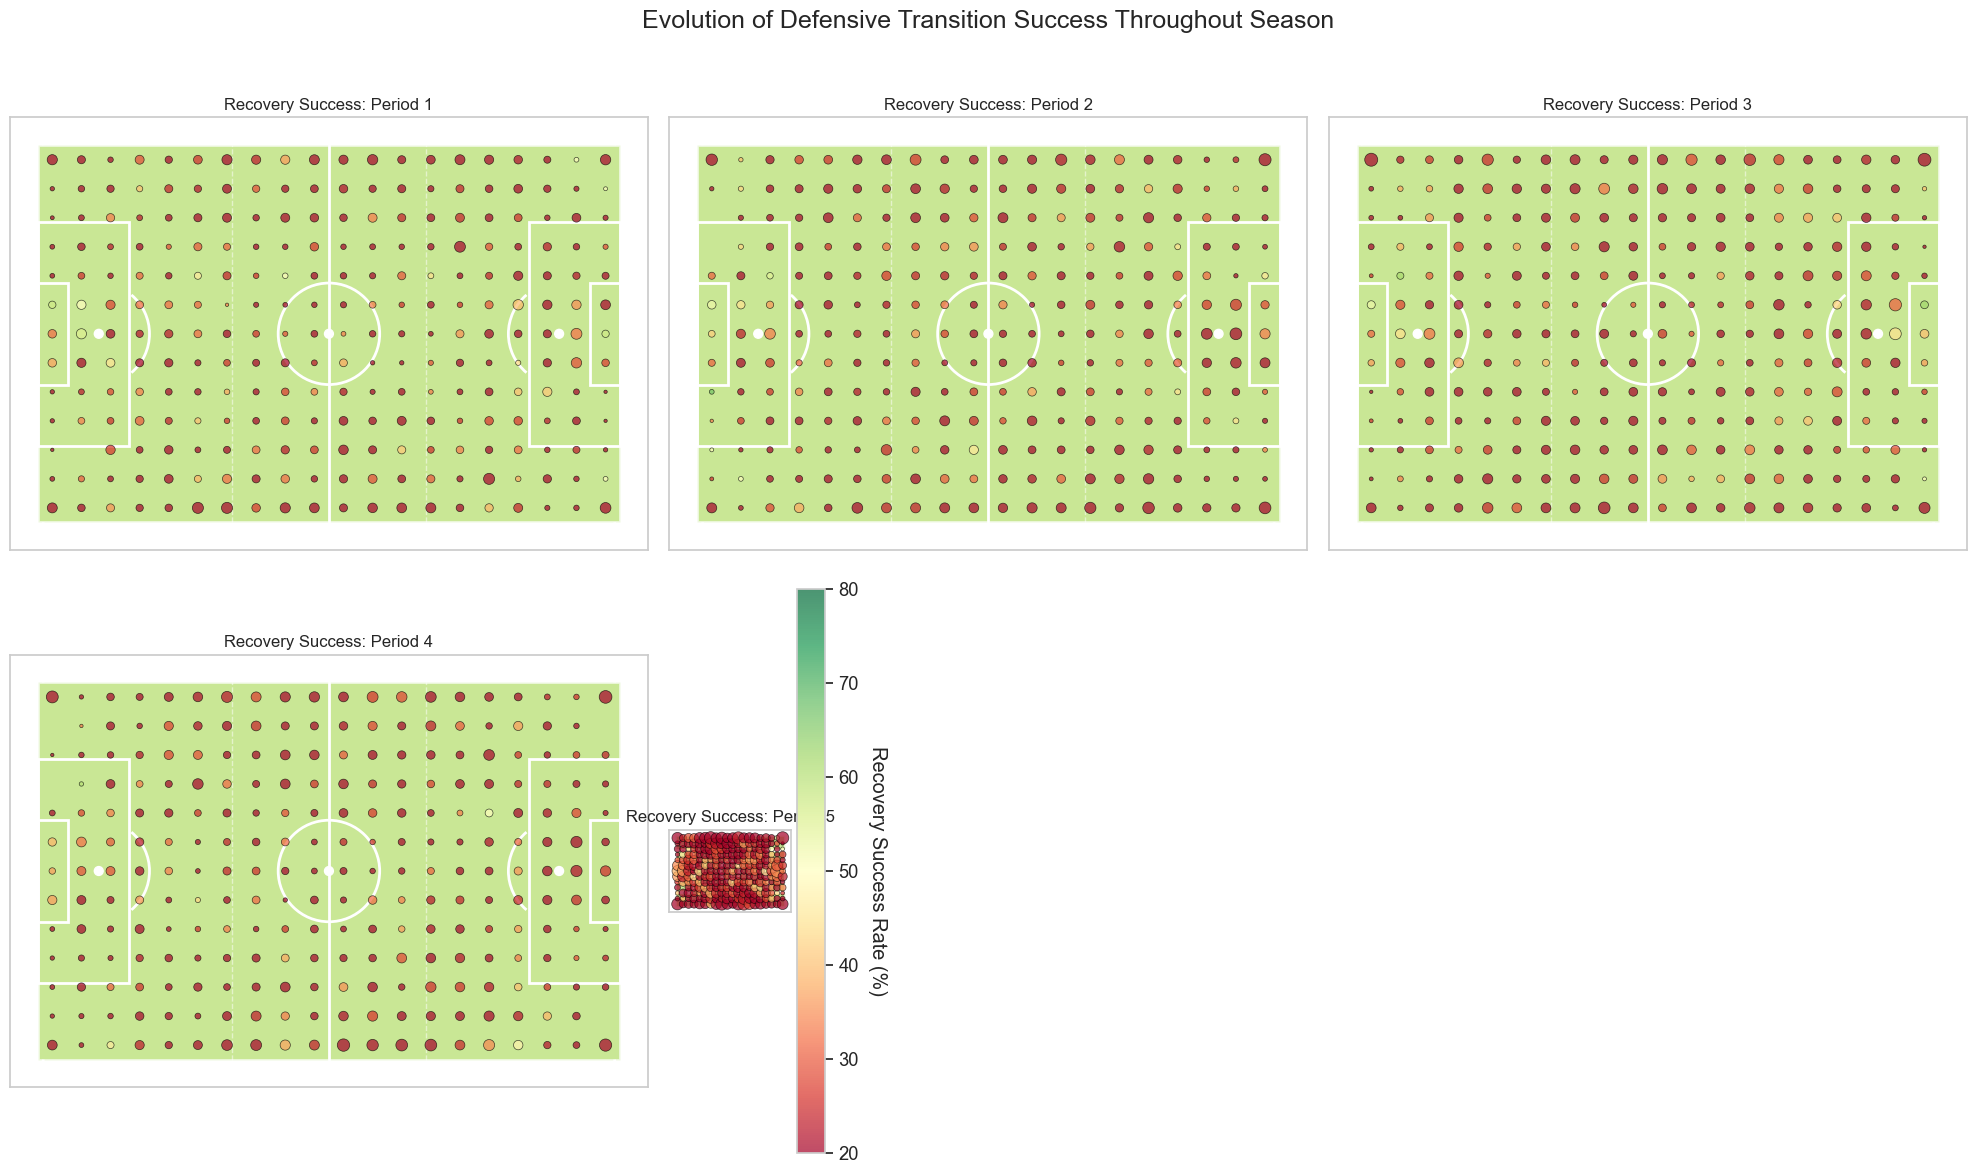

In [48]:
if 'game_id' in df.columns:
    matches = df['game_id'].unique()
    
    match_groups = np.array_split(matches, 5)
    
    plt.figure(figsize=(20, 12))
    
    for i, match_group in enumerate(match_groups):
        ax = plt.subplot(2, 3, i+1)
        draw_pitch(ax)
        
        period_data = df[df['game_id'].isin(match_group)].drop_duplicates(subset=['loss_event_id']).copy()
        
        period_data['x_bin'] = pd.cut(period_data['loss_x'], bins=x_bins, labels=False, include_lowest=True)
        period_data['y_bin'] = pd.cut(period_data['loss_y'], bins=y_bins, labels=False, include_lowest=True)
        
        period_bin_success = period_data.groupby(['x_bin', 'y_bin'])['defensive_success'].agg(['count', 'mean']).reset_index()
        period_bin_success.columns = ['x_bin', 'y_bin', 'count', 'success_rate']
        period_bin_success['success_rate'] = period_bin_success['success_rate'] * 100
        
        period_bin_success['x_center'] = x_bins[period_bin_success['x_bin'].astype(int)] + (x_bins[1] - x_bins[0])/2
        period_bin_success['y_center'] = y_bins[period_bin_success['y_bin'].astype(int)] + (y_bins[1] - y_bins[0])/2
        
        period_bin_success = period_bin_success[period_bin_success['count'] >= 3]
        
        scatter = ax.scatter(period_bin_success['x_center'], period_bin_success['y_center'], 
                           s=period_bin_success['count']*2, c=period_bin_success['success_rate'], 
                           cmap='RdYlGn', vmin=20, vmax=80, alpha=0.7, edgecolors='black', linewidth=0.5)
        
        period_name = f"Period {i+1}"
        ax.set_title(f'Recovery Success: {period_name}', fontsize=12)
    
    plt.subplot(2, 3, 6)
    plt.axis('off')
    cbar = plt.colorbar(scatter, fraction=0.8, pad=0.01)
    cbar.set_label('Recovery Success Rate (%)', rotation=270, labelpad=20)
    
    plt.suptitle('Evolution of Defensive Transition Success Throughout Season', fontsize=18)
    plt.tight_layout()
    plt.savefig('../visualisation/evolution_defensive_transition_success.png', dpi=300, bbox_inches='tight')
    plt.show()

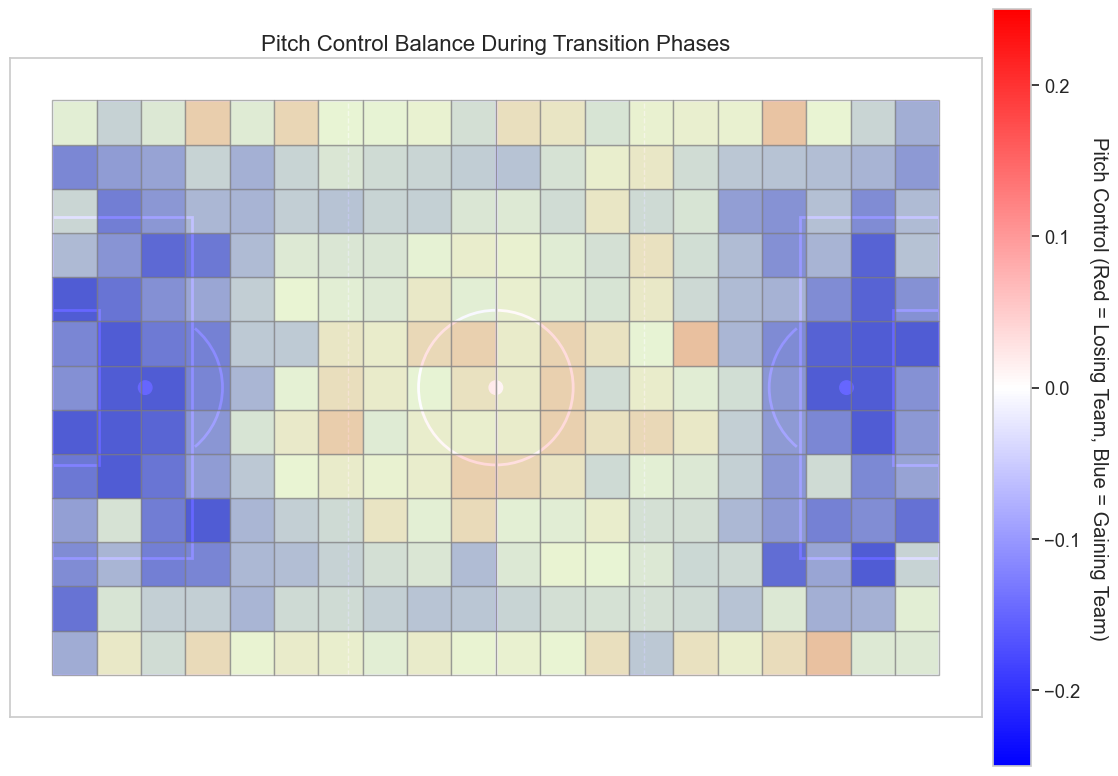

In [65]:
if 'team_id' in df.columns and 'team_gaining_ball' in df.columns:
    plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    draw_pitch(ax)

    control_data = df.copy()
    control_data['x_bin'] = pd.cut(control_data['start_x'], bins=x_bins, labels=False, include_lowest=True)
    control_data['y_bin'] = pd.cut(control_data['start_y'], bins=y_bins, labels=False, include_lowest=True)

    losing_team_control = control_data[control_data['team_id'] == control_data['team_losing_ball']].groupby(['x_bin', 'y_bin']).size()
    gaining_team_control = control_data[control_data['team_id'] == control_data['team_gaining_ball']].groupby(['x_bin', 'y_bin']).size()

    control_balance = pd.merge(losing_team_control.reset_index(), gaining_team_control.reset_index(),
                              on=['x_bin', 'y_bin'], how='outer', suffixes=('_losing', '_gaining'))
    control_balance.fillna(0, inplace=True)

    total_actions = control_balance['0_losing'] + control_balance['0_gaining']
    control_balance['control_index'] = np.where(
        total_actions > 0,
        (control_balance['0_losing'] - control_balance['0_gaining']) / total_actions,
        0
    )

    control_balance['x_center'] = x_bins[control_balance['x_bin'].astype(int)] + (x_bins[1] - x_bins[0])/2
    control_balance['y_center'] = y_bins[control_balance['y_bin'].astype(int)] + (y_bins[1] - y_bins[0])/2

    control_balance = control_balance[total_actions >= 5]

    cmap = LinearSegmentedColormap.from_list('control_balance', ['#0000FF', '#FFFFFF', '#FF0000'])

    for _, row in control_balance.iterrows():
        x_width = x_bins[1] - x_bins[0]
        y_width = y_bins[1] - y_bins[0]
        rect = patches.Rectangle(
            (x_bins[int(row['x_bin'])], y_bins[int(row['y_bin'])]),
            x_width, y_width,
            linewidth=1,
            edgecolor='gray',
            facecolor=cmap((row['control_index'] + 0.25) / 0.5),  # Map from [-0.5,0.5] to [0,1]
            alpha=0.6
        )
        ax.add_patch(rect)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(-0.25, 0.25))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, pad=0.01)
    cbar.set_label('Pitch Control (Red = Losing Team, Blue = Gaining Team)', rotation=270, labelpad=20)

    plt.title('Pitch Control Balance During Transition Phases', fontsize=16)
    plt.tight_layout()
    plt.savefig('../visualisation/pitch_control_balance.png', dpi=300, bbox_inches='tight')
    plt.show()

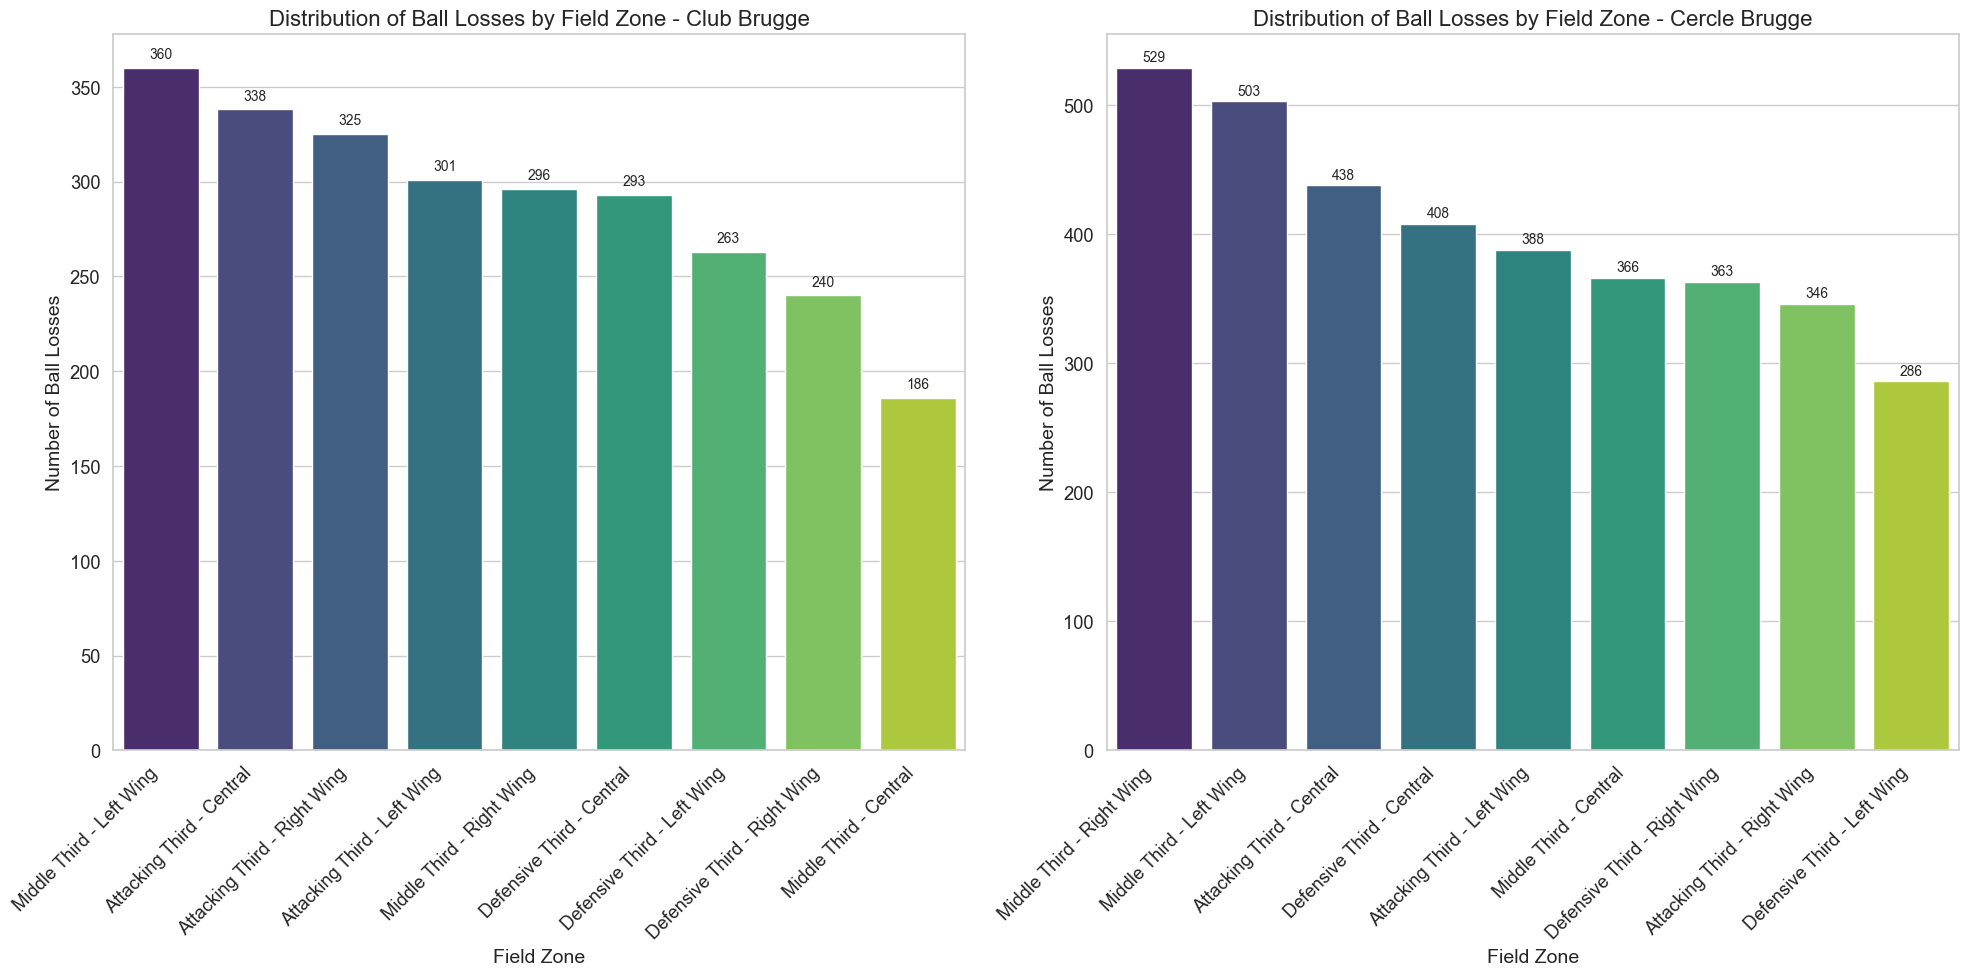

In [67]:
club_brugge_data = df[df['team_name'] == 'Club Brugge']
cercle_brugge_data = df[df['team_name'] == 'Cercle Brugge']

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
club_zone_counts = club_brugge_data.drop_duplicates(subset=['loss_event_id'])['loss_zone'].value_counts().sort_values(ascending=False)
ax1 = sns.barplot(x=club_zone_counts.index, y=club_zone_counts.values, palette='viridis')
plt.title('Distribution of Ball Losses by Field Zone - Club Brugge', fontsize=16)
plt.xlabel('Field Zone', fontsize=14)
plt.ylabel('Number of Ball Losses', fontsize=14)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(club_zone_counts.values):
    ax1.text(i, v + 5, str(v), ha='center', fontsize=10)

plt.subplot(1, 2, 2)
cercle_zone_counts = cercle_brugge_data.drop_duplicates(subset=['loss_event_id'])['loss_zone'].value_counts().sort_values(ascending=False)
ax2 = sns.barplot(x=cercle_zone_counts.index, y=cercle_zone_counts.values, palette='viridis')
plt.title('Distribution of Ball Losses by Field Zone - Cercle Brugge', fontsize=16)
plt.xlabel('Field Zone', fontsize=14)
plt.ylabel('Number of Ball Losses', fontsize=14)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(cercle_zone_counts.values):
    ax2.text(i, v + 5, str(v), ha='center', fontsize=10)

plt.tight_layout()

plt.savefig(f'../visualisation/ball_loss_distribution_{club_brugge_data["team_name"].unique()[0]}_{cercle_brugge_data["team_name"].unique()[0]}.png', dpi=300, bbox_inches='tight')

plt.show()

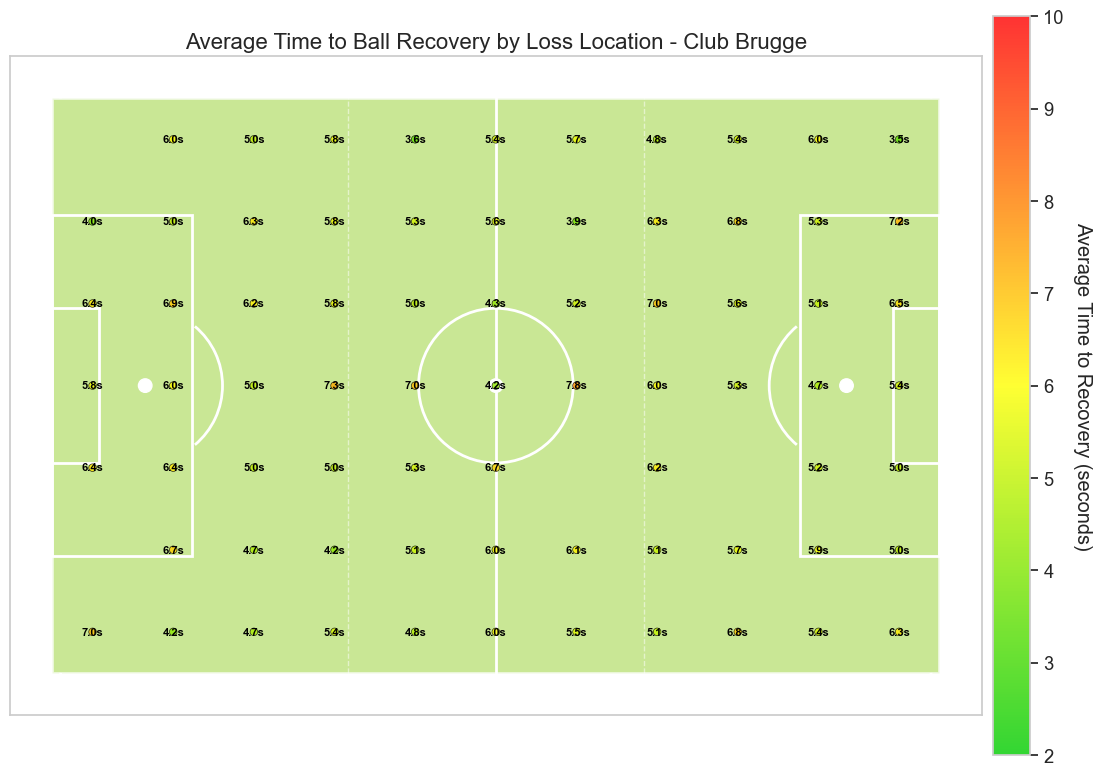

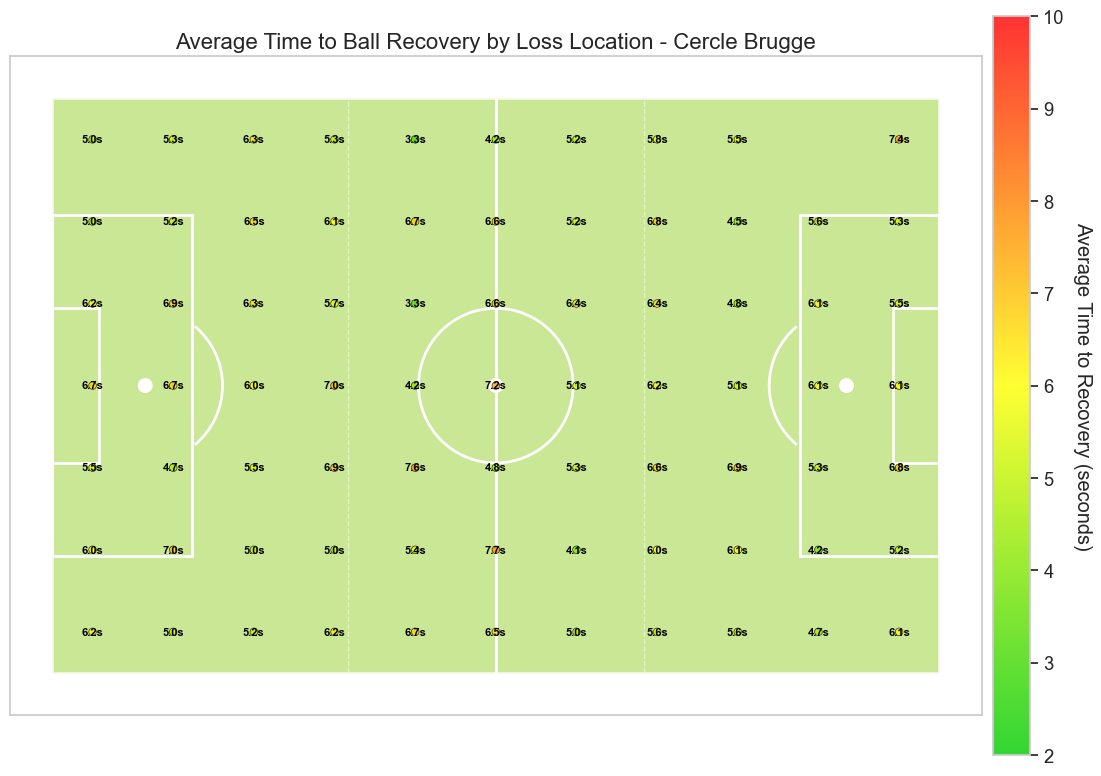

In [69]:
def plot_recovery_time_map(team_data, team_name):
    plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    draw_pitch(ax)
    
    x_grid = np.linspace(0, 105, 12)
    y_grid = np.linspace(0, 68, 8)
    
    recovery_time_data = team_data.drop_duplicates(subset=['loss_event_id']).copy()
    recovery_time_data = recovery_time_data[recovery_time_data['time_to_defensive_action'].notnull()]
    
    recovery_time_data['x_bin'] = pd.cut(recovery_time_data['loss_x'], bins=x_grid, labels=False, include_lowest=True)
    recovery_time_data['y_bin'] = pd.cut(recovery_time_data['loss_y'], bins=y_grid, labels=False, include_lowest=True)
    
    bin_recovery_time = recovery_time_data.groupby(['x_bin', 'y_bin'])['time_to_defensive_action'].agg(['mean', 'count']).reset_index()
    bin_recovery_time.columns = ['x_bin', 'y_bin', 'avg_time', 'count']
    
    bin_recovery_time['x_center'] = x_grid[bin_recovery_time['x_bin'].astype(int)] + (x_grid[1] - x_grid[0])/2
    bin_recovery_time['y_center'] = y_grid[bin_recovery_time['y_bin'].astype(int)] + (y_grid[1] - y_grid[0])/2
    
    bin_recovery_time = bin_recovery_time[bin_recovery_time['count'] >= 2]
    
    cmap = LinearSegmentedColormap.from_list('recovery_time', ['#00CC00', '#FFFF00', '#FF0000'])
    
    scatter = plt.scatter(bin_recovery_time['x_center'], bin_recovery_time['y_center'], 
                         s=30, c=bin_recovery_time['avg_time'], 
                         cmap=cmap, vmin=2, vmax=10, alpha=0.8, edgecolors='black', linewidth=0.5)
    
    for _, row in bin_recovery_time.iterrows():
        plt.text(row['x_center'], row['y_center'], f"{row['avg_time']:.1f}s", 
                ha='center', va='center', fontsize=8, color='black', fontweight='bold')
    
    cbar = plt.colorbar(scatter, pad=0.01)
    cbar.set_label('Average Time to Recovery (seconds)', rotation=270, labelpad=20)
    
    plt.title(f'Average Time to Ball Recovery by Loss Location - {team_name}', fontsize=16)
    plt.tight_layout()
    
    return plt

plot_recovery_time_map(club_brugge_data, 'Club Brugge')
plt.savefig(f'../visualisation/recovery_time_map_{club_brugge_data["team_name"].unique()[0]}.png', dpi=300, bbox_inches='tight')
plt.show()

plot_recovery_time_map(cercle_brugge_data, 'Cercle Brugge')
plt.savefig(f'../visualisation/recovery_time_map_{cercle_brugge_data["team_name"].unique()[0]}.png', dpi=300, bbox_inches='tight')
plt.show()

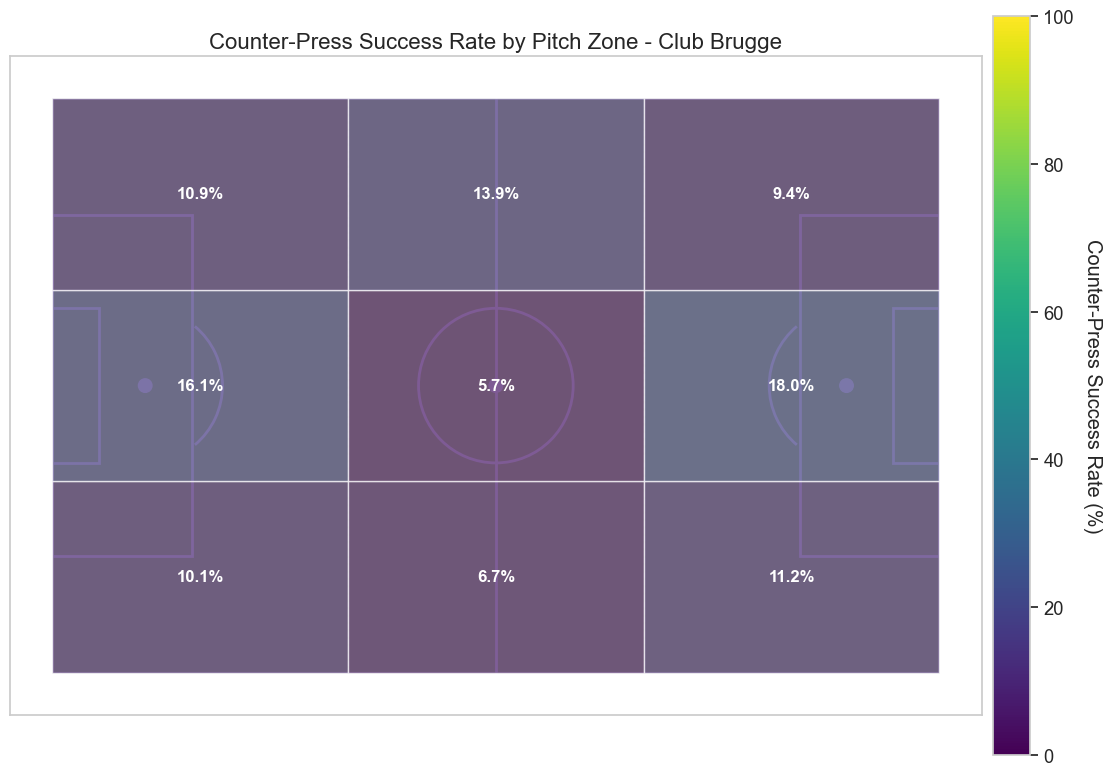

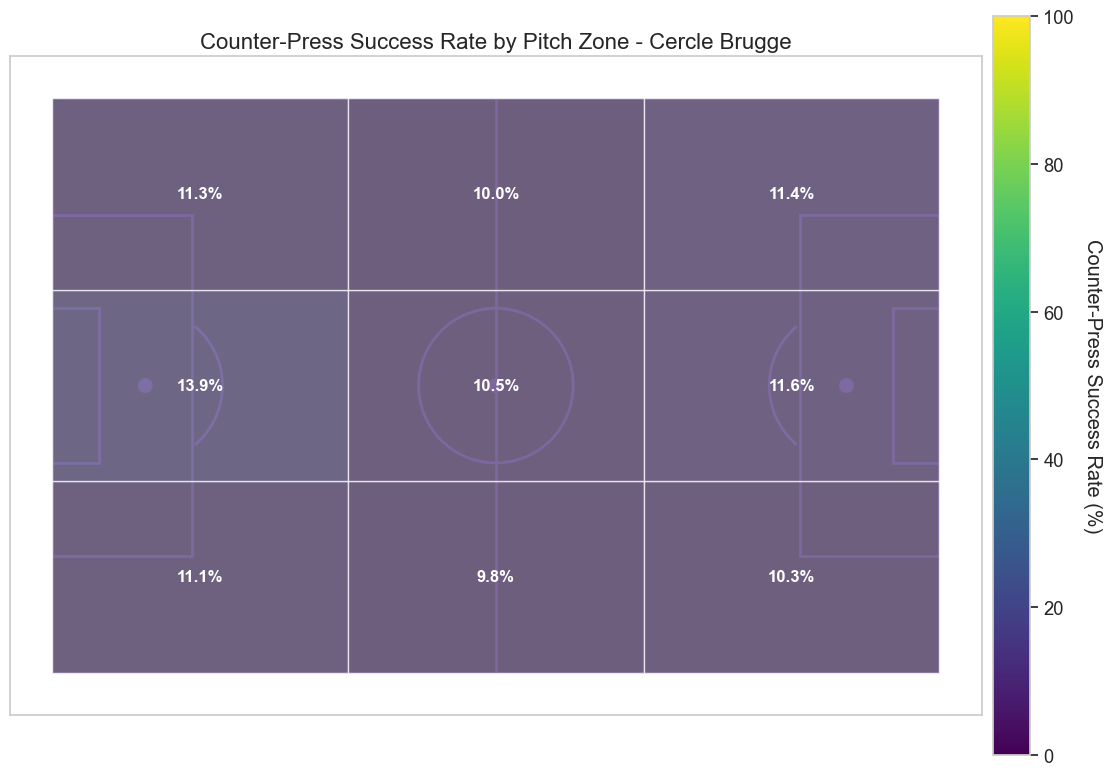

In [76]:
def plot_counterpress_success(team_data, team_name):
    plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    draw_pitch(ax)
    
    team_data['is_counter_press'] = team_data['seconds_after_loss'] <= 5
    counter_press = team_data[team_data['is_counter_press'] & (team_data['team_id'] == team_data['team_losing_ball'])]
    
    x_zones = [0, 35, 70, 105]  # Defensive, Middle, Attacking thirds
    y_zones = [0, 22.67, 45.33, 68]  # Left, Central, Right
    
    success_matrix = np.zeros((3, 3))
    count_matrix = np.zeros((3, 3))
    
    for i in range(3):
        for j in range(3):
            x_min, x_max = x_zones[i], x_zones[i+1]
            y_min, y_max = y_zones[j], y_zones[j+1]
            
            zone_data = counter_press[(counter_press['loss_x'] >= x_min) & (counter_press['loss_x'] < x_max) &
                                     (counter_press['loss_y'] >= y_min) & (counter_press['loss_y'] < y_max)]
            
            total_actions = len(zone_data)
            successful_actions = sum(zone_data['successful_defensive_action'])
            
            if total_actions > 0:
                success_rate = (successful_actions / total_actions) * 100
            else:
                success_rate = 0
                
            success_matrix[j, i] = success_rate
            count_matrix[j, i] = total_actions
    
    for i in range(3):
        for j in range(3):
            x_width = x_zones[i+1] - x_zones[i]
            y_width = y_zones[j+1] - y_zones[j]
            
            rect = patches.Rectangle(
                (x_zones[i], y_zones[j]),
                x_width, y_width,
                linewidth=1,
                edgecolor='white',
                facecolor=plt.cm.viridis(success_matrix[j, i] / 100),
                alpha=0.7
            )
            ax.add_patch(rect)
            
            ax.text(x_zones[i] + x_width/2, y_zones[j] + y_width/2, 
                   f"{success_matrix[j, i]:.1f}%", 
                   ha='center', va='center', fontsize=12, fontweight='bold', color='white')
    
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(0, 100))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, pad=0.01)
    cbar.set_label('Counter-Press Success Rate (%)', rotation=270, labelpad=20)
    
    plt.title(f'Counter-Press Success Rate by Pitch Zone - {team_name}', fontsize=16)
    plt.tight_layout()
    
    return plt

plot_counterpress_success(club_brugge_data, 'Club Brugge')
plt.savefig(f'../visualisation/counterpress_success_{club_brugge_data["team_name"].unique()[0]}.png', dpi=300, bbox_inches='tight')
plt.show()

plot_counterpress_success(cercle_brugge_data, 'Cercle Brugge')
plt.savefig(f'../visualisation/counterpress_success_{cercle_brugge_data["team_name"].unique()[0]}.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1400x800 with 0 Axes>

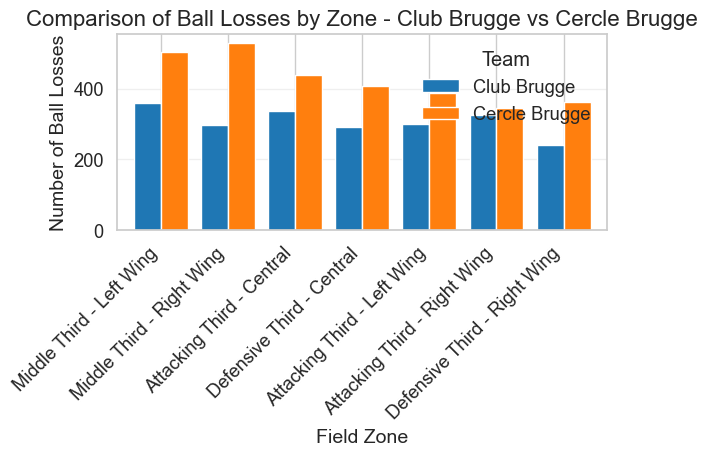

In [78]:
plt.figure(figsize=(14, 8))

club_zones = club_brugge_data.drop_duplicates(subset=['loss_event_id'])['loss_zone'].value_counts()
cercle_zones = cercle_brugge_data.drop_duplicates(subset=['loss_event_id'])['loss_zone'].value_counts()

common_zones = pd.DataFrame({
    'Club Brugge': club_zones,
    'Cercle Brugge': cercle_zones
}).fillna(0)

common_zones['Total'] = common_zones.sum(axis=1)
common_zones = common_zones.sort_values('Total', ascending=False).head(7)
common_zones = common_zones.drop('Total', axis=1)

common_zones.plot(kind='bar', width=0.8)
plt.title('Comparison of Ball Losses by Zone - Club Brugge vs Cercle Brugge', fontsize=16)
plt.xlabel('Field Zone', fontsize=14)
plt.ylabel('Number of Ball Losses', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Team')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../visualisation/ball_loss_comparison_top_zones.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1400x800 with 0 Axes>

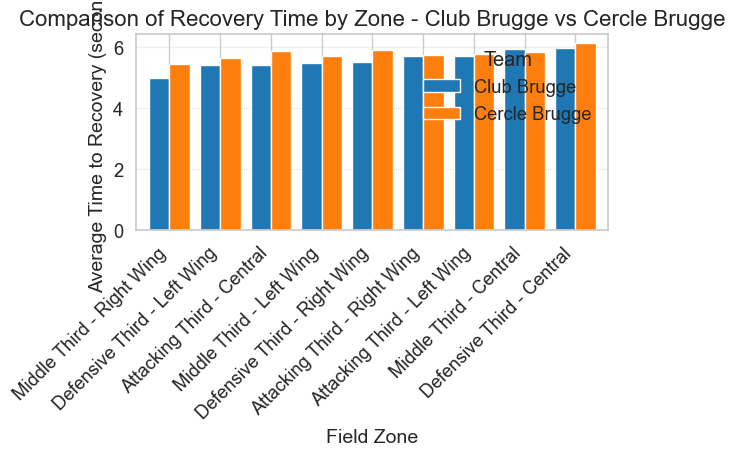

In [81]:
club_recovery = club_brugge_data.drop_duplicates(subset=['loss_event_id'])
club_recovery = club_recovery[club_recovery['time_to_defensive_action'].notnull()].groupby('loss_zone')['time_to_defensive_action'].mean()

cercle_recovery = cercle_brugge_data.drop_duplicates(subset=['loss_event_id'])
cercle_recovery = cercle_recovery[cercle_recovery['time_to_defensive_action'].notnull()].groupby('loss_zone')['time_to_defensive_action'].mean()

recovery_comparison = pd.DataFrame({
    'Club Brugge': club_recovery,
    'Cercle Brugge': cercle_recovery
}).fillna(0)

recovery_comparison = recovery_comparison[recovery_comparison.min(axis=1) > 0]
recovery_comparison = recovery_comparison.sort_values('Club Brugge')

plt.figure(figsize=(14, 8))
recovery_comparison.plot(kind='bar', width=0.8)
plt.title('Comparison of Recovery Time by Zone - Club Brugge vs Cercle Brugge', fontsize=16)
plt.xlabel('Field Zone', fontsize=14)
plt.ylabel('Average Time to Recovery (seconds)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Team')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../visualisation/recovery_time_comparison_top_zones.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1400x800 with 0 Axes>

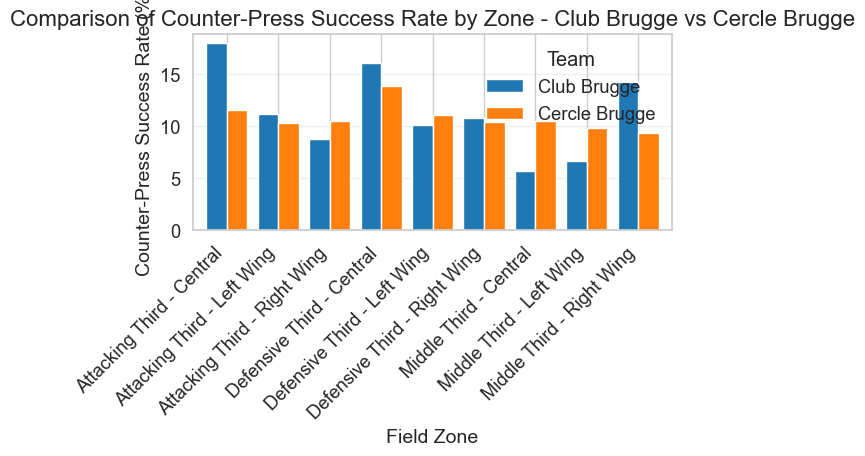

In [83]:
club_brugge_data['is_counter_press'] = club_brugge_data['seconds_after_loss'] <= 5
cercle_brugge_data['is_counter_press'] = cercle_brugge_data['seconds_after_loss'] <= 5

club_counter_press = club_brugge_data[club_brugge_data['is_counter_press'] & 
                                    (club_brugge_data['team_id'] == club_brugge_data['team_losing_ball'])]
club_success = club_counter_press.groupby('loss_zone')['successful_defensive_action'].agg(['count', 'sum'])
club_success['success_rate'] = (club_success['sum'] / club_success['count'] * 100).round(1)

cercle_counter_press = cercle_brugge_data[cercle_brugge_data['is_counter_press'] & 
                                       (cercle_brugge_data['team_id'] == cercle_brugge_data['team_losing_ball'])]
cercle_success = cercle_counter_press.groupby('loss_zone')['successful_defensive_action'].agg(['count', 'sum'])
cercle_success['success_rate'] = (cercle_success['sum'] / cercle_success['count'] * 100).round(1)

counter_press_comparison = pd.DataFrame({
    'Club Brugge': club_success['success_rate'],
    'Cercle Brugge': cercle_success['success_rate']
})

counter_press_comparison = counter_press_comparison.fillna(0)
counter_press_comparison = counter_press_comparison[(counter_press_comparison > 0).any(axis=1)]

plt.figure(figsize=(14, 8))
counter_press_comparison.plot(kind='bar', width=0.8)
plt.title('Comparison of Counter-Press Success Rate by Zone - Club Brugge vs Cercle Brugge', fontsize=16)
plt.xlabel('Field Zone', fontsize=14)
plt.ylabel('Counter-Press Success Rate (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Team')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../visualisation/counter_press_success_comparison_top_zones.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1200x800 with 0 Axes>

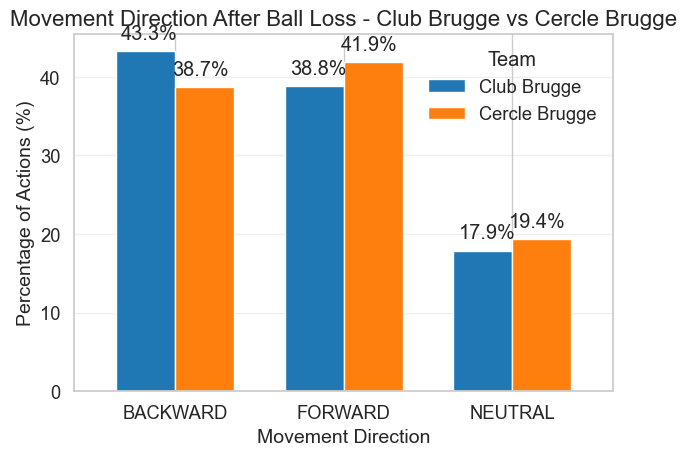

In [85]:
club_movement = club_brugge_data[club_brugge_data['team_id'] == club_brugge_data['team_losing_ball']]
club_direction = club_movement.groupby('movement_direction').size() / len(club_movement) * 100

cercle_movement = cercle_brugge_data[cercle_brugge_data['team_id'] == cercle_brugge_data['team_losing_ball']]
cercle_direction = cercle_movement.groupby('movement_direction').size() / len(cercle_movement) * 100

movement_comparison = pd.DataFrame({
    'Club Brugge': club_direction,
    'Cercle Brugge': cercle_direction
}).fillna(0)

plt.figure(figsize=(12, 8))
movement_comparison.plot(kind='bar', width=0.7)
plt.title('Movement Direction After Ball Loss - Club Brugge vs Cercle Brugge', fontsize=16)
plt.xlabel('Movement Direction', fontsize=14)
plt.ylabel('Percentage of Actions (%)', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Team')
plt.grid(axis='y', alpha=0.3)

for i, (idx, row) in enumerate(movement_comparison.iterrows()):
    for j, val in enumerate(row):
        plt.text(i - 0.15 + j*0.3, val + 1, f'{val:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('../visualisation/movement_direction_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

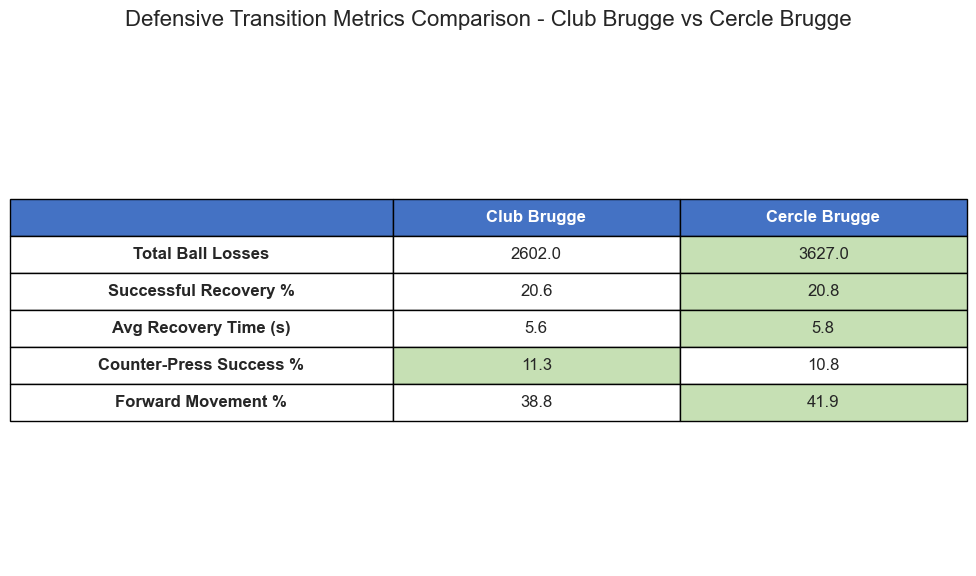

In [86]:
club_transitions = club_brugge_data.drop_duplicates(subset=['loss_event_id'])
cercle_transitions = cercle_brugge_data.drop_duplicates(subset=['loss_event_id'])

metrics = pd.DataFrame({
    'Metric': [
        'Total Ball Losses',
        'Successful Recovery %', 
        'Avg Recovery Time (s)',
        'Counter-Press Success %',
        'Forward Movement %'
    ],
    'Club Brugge': [
        len(club_transitions),
        club_transitions['defensive_success'].mean() * 100,
        club_transitions['time_to_defensive_action'].dropna().mean(),
        club_success['success_rate'].mean() if len(club_success) > 0 else 0,
        club_movement[club_movement['movement_direction'] == 'FORWARD'].shape[0] / len(club_movement) * 100
    ],
    'Cercle Brugge': [
        len(cercle_transitions),
        cercle_transitions['defensive_success'].mean() * 100,
        cercle_transitions['time_to_defensive_action'].dropna().mean(),
        cercle_success['success_rate'].mean() if len(cercle_success) > 0 else 0,
        cercle_movement[cercle_movement['movement_direction'] == 'FORWARD'].shape[0] / len(cercle_movement) * 100
    ]
})

metrics.iloc[1:, 1:] = metrics.iloc[1:, 1:].round(1)
metrics.iloc[0, 1:] = metrics.iloc[0, 1:].astype(int)

plt.figure(figsize=(10, 6))
plt.axis('off')
table = plt.table(
    cellText=metrics.values,
    colLabels=['', 'Club Brugge', 'Cercle Brugge'],
    loc='center',
    cellLoc='center',
    colWidths=[0.4, 0.3, 0.3]
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

for i in range(len(metrics)+1):
    if i == 0:  # Header row
        for j in range(3):
            table[(i, j)].set_facecolor('#4472C4')
            table[(i, j)].set_text_props(color='white', fontweight='bold')
    else:
        for j in range(3):
            if j == 0:  # Metric names
                table[(i, j)].set_text_props(fontweight='bold')
            if j > 0:  # Values - highlight higher values
                if i > 0 and metrics.iloc[i-1, j] > metrics.iloc[i-1, 3-j]:
                    table[(i, j)].set_facecolor('#C6E0B4')

plt.title('Defensive Transition Metrics Comparison - Club Brugge vs Cercle Brugge', fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('../visualisation/defensive_transition_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()